<div style="border:solid green 2px; padding: 20px">
<b>Привет, Константин!</b>

Меня зовут Алан, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Тобой уже проделана большая работа над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет прният. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания, либо рекоммендации к улучшению. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Выявление закономерностей, определяющих успешность игры

## Краткое описание проекта

#### Имеются данные по играм до 2016 года. Нужно выявить по ним определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Более того, нужно отработать принцип работы с данными, который позволит имея некоторый данные по играм за прошлые годы, давать прогноз по ним.

## Цель проекта

#### Спланировать кампанию на 2017-ый год. Более шире: отработать принцип работы с данными, который позволит прогнозировать, имея данные по играм за прошлые годы.

<a id="first"></a>
## Структура проекта

1. [Изучение общей информации по данным](#start)
2. [Предобработка данных](#preprocessing)
 * [Замена названий столбцов](#name) 
 * [Подсчёт суммарных продаж во всех регионах](#count)
 * [Преобразование данных в нужные типы](#type)
 * [Обработка пропусков](#absence)
3. [Исследовательский анализ данных](#research)
    * [Анализ количества игр по годам](#year)
    * [Анализ по платформам](#platform)
    * [Анализ по актуальному периоду](#2017)
    * [Выбор потенциально прибыльных платформ](#potential)
    * [Анализ глобальных продаж по платформам](#global)
    * [Корреляция между отзывами и продажами](#cor)
    * [Соотнесение выводов с продажами на других платформах](#comp)
    * [Распределение игр по жанрам](#genre)
4. [Составление портрета пользователя каждого региона](#port)
    * [Самые популярные платформы (топ-5)](#top_plat)
    * [Самые популярные жанры (топ-5)](#top_genre)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#esrb)
5. [Проверка гипотез](#hyp)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#dif_1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#dif_2)
6. [Общий вывод по работе](#summary)   

<div class="alert alert-success">

**Комментарий ревьюера:** Хороший подход к оформлению 👍 
</div>

<a id="start"></a>
## Шаг 1. Изучение общей информации по данным
 * [к оглавлению](#first)
 * [к выводу](#sum_1)
 * [к следующему шагу](#preprocessing)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
import numpy as np 
from scipy import stats
from pymystem3 import Mystem 
from datetime import timedelta
import requests
import re
from bs4 import BeautifulSoup
from collections import Counter

У нас есть только один датасет, откроем его и изучим, что в нём есть.

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вот справочная информация, предоставленная к данным:

 * **Name** — название игры
 * **Platform** — платформа
 * **Year_of_Release** — год выпуска
 * **Genre** — жанр игры
 * **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
 * **EU_sales** — продажи в Европе (миллионы проданных копий)
 * **JP_sales** — продажи в Японии (миллионы проданных копий)
 * **Other_sales** — продажи в других странах (миллионы проданных копий)
 * **Critic_Score** — оценка критиков (максимум 100)
 * **User_Score** — оценка пользователей (максимум 10)
 * **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016-ый год могут быть неполными.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что 2-х значений не хватает в **Name**, несколько сотен в **Year_of_Release**, 2-х в **Genre**, практически половина значений в **Critic_Score**, большей части в **User_Score** и **Rating**. Надо будет решить, как их заполнять или не заполнять.

По типу данных нужно перевести **Year_of_Release** в **int**, потому что это целочисленные данные, **User_Score** следует перевести в численные данные, а то стоит **object**, следует понять, есть ли смысл **Critic_Score** быть **float**, а не **int**.

In [5]:
games['Name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

По названиям игр хочется как-то удостоверится, что они не повторяются... Кажется, что повторов не должно быть, но мало ли.

In [6]:
len(games['Name'].sort_values().unique())

11560

Интересно, что какая-то часть игр присутствует в таблице не один раз.

In [7]:
games['Name'].value_counts().head(5)

Need for Speed: Most Wanted    12
Madden NFL 07                   9
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Name: Name, dtype: int64

In [8]:
games.query('Name == "Need for Speed: Most Wanted"').sort_values(by='Year_of_Release')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN


Это значит, что эту игру издавали на разных платформах. Более того, на некоторых платформах игры переиздавались. Надо будет понять, как считать эти значения, в любом случае потом группировкой они будут объединяться. Но возникает вопрос, что такое 0.00 в **sales**? Значит ли это, что в этом году игра не была выпущена в это стране? Думаю, что это похоже на правду.

In [9]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видно, что по годам данные с **1980** по **2016** год, есть нулевые значения во всех столбцах по продажам, минимальная оценка критиков **13**, максимальная – **98**. По столбцу **User_Score** пока не можем извлечь информацию, потому что там не численные данные.

Давайте посмотрим, какие есть значения по ESMR рейтингу.

In [10]:
games['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

 * **RP** – Rating Pending
 * **EC** – Early Childhood 3+
 * **K-A** – Kids to Adults (старая аббревиатура для E) 6+
 * **E** – Everyone 6+
 * **E10+** – Everyone 10+
 * **T** – Teen 13+
 * **M** – Mature 17+
 * **AO** – Adults Only 18+

Можем потом исправить все значения **K-A**, так как это то же самое, что **E** сейчас, только раньше использовалось (а смысл тот же).

Давайте посмотрим, какие платформы есть, есть ли повторяющиеся и тд.

In [11]:
games['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

 * **2600** – Atari 2600
 * **3DO** – 3DO Interactive Multiplayer
 * **3DS** – Nintendo 3DS
 * **DC** – Dreamcast
 * **DS** – Nintendo DS
 * **GB** – Game Boy
 * **GBA** – Game Boy Advance
 * **GC** – Nintendo GameCube
 * **GEN** – Sega Genesis / Mega Drive
 * **GG** – Sega Game Gear
 * **N64** – Nintendo 64
 * **NES** – Nintendo Entertainment System
 * **NG** – Neo Geo
 * **PC** – personal computer
 * **PCFX** – PC-FX
 * **PS** – PlayStation
 * **PS2** – PlayStation 2
 * **PS3** – PlayStation 3
 * **PS4** – PlayStation 4
 * **PSP** – PlayStation Portable
 * **PSV** – PlayStation Vita
 * **SAT** – Sega Saturn
 * **SCD** – Sega Mega CD
 * **SNES** – Super Nintendo Entertainment System
 * **TG16** – TurboGrafx-16
 * **WS** – WonderSwan
 * **Wii** – Nintendo Wii
 * **WiiU** – Wii U
 * **X360** – Xbox 360
 * **XB** – Xbox
 * **XOne** – Xbox One

Повторяющихся нет, но все эти платформы из очень разных поколений приставок, так что, возможно, будет хорошей идеей добавить им классификацию по поколениям, а, может быть, это будет уже лишним, посмотрим.

Посмотрим ещё на жанры, какие они есть и что значат.

In [12]:
games['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

* **Action** – жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции.
* **Adventure** – один из основных жанров компьютерных игр, представляющий собой интерактивную историю с главным героем, управляемым игроком.
* **Fighting** – жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого арена (часть игровой вселенной, не управляемая участником игры, на которой происходят основные действия игры).
* **Misc** – многожанровые игры.
* **Platform** – жанр компьютерных игр, в которых основной чертой игрового процесса является прыгание по платформам, лазанье по лестницам, собирание предметов, обычно необходимых для завершения уровня.
* **Puzzle** – название жанра компьютерных игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции.
* **Racing** – жанр компьютерных игр с видом от первого или от третьего лица, в которых игрок принимает участие в гоночном соревновании среди наземных, водных, воздушных или космических транспортных средств.
* **Role-Playing** – жанр компьютерных игр, основанный на элементах игрового процесса традиционных настольных ролевых игр. 
* **Shooter** – жанр компьютерных игр, который – стрелялка
* **Simulation** –  жанр компьютерных игр, сделанных как симулятор действий реальной жизни.
* **Sports** – жанр компьютерных игр-симуляторов спортивных состязаний.
* **Strategy** – жанр компьютерных игр, в которых для успеха нужно применить стратегическое мышление.

Предлагаю не ждать второго шага и сразу избавиться от двух **NaN** без имён, вангую, что это у них нет жанров... Сами рассудите, что даёт нам ячейка с ноу-нейм и ноу-жанр информацией? Ничего!

In [13]:
games[games['Genre'].isna() == True]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
games = games[games['Genre'].isna() != True]

И напоследок посмотрим данные в **Critic_Score**, чтобы понять, можно ли их перевести потом в **int**.

In [15]:
games['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Все данные целочисленные, можно их переводить в **int** для удобства. А в **User_Score** видно **tbd** значение (to be downloaded), которое значит, что данные ещё будут загружены, и его надо бы переформатировать во что-то более съедобное.

In [16]:
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

<a id="sum_1"></a>
## Вывод
 * [к началу шага](#start)

У нас есть датасет с играми от 1985 до 2016 года. По каждой игре в таблице есть её название, платформа, для которой вышла игра, год выпуска, жанр, количество продаж по регионам, рейтинг критиков и пользователей, рейтинг ESRB. Мы сразу убрали две строки, в которых не было названия игры и жанра, так как они не несут большой информационной важности. И да, некоторые игры повторяются, потому что выходили на разных платформах и даже иногда переиздавались.

Не хватает немного значений в **Year_Of_Release**, практически половина значений в **Critic_Score**, большей части в **User_Score** и **Rating**. Надо будет решить, как их заполнять или не заполнять. По типу данных нужно перевести **Year_of_Release** в **int**, потому что это целочисленные данные, **User_Score** следует перевести в численные данные (и решить, что делать с **tbd**, так как из-за него они находятся в таком типе данных), а то стоит **object**,  а **Critic_Score** – в **int**. Так же, нужно поменять **K-A** на **E** в **Rating**, так как это одно и то же, а первое – это старое название второго.

На следующем этапе заменим названия столбцов, чтобы все они были с маленькой буквы для удоства, преобразуем часть данных в нужные типы, обработаем пропуски и добавим дополнительные столбцы. 

<div class="alert alert-success">

**Комментарий ревьюера:** Данный шаг выполнен на высшем уровне, так и следует подходить к анализу данных.
</div>

<a id="preprocessing"></a>
## Шаг 2. Предобработка данных
 * [к оглавлению](#first)
 * [к выводу](#sum_2)
 * [к следующему шагу](#research)
 * [к предыдущему шагу](#start)
 
 
1. [Замена названий столбцов](#name) 
2. [Подсчёт суммарных продаж во всех регионах](#count)
3. [Преобразование данных в нужные типы](#type)
4. [Обработка пропусков](#absence)

<a id="name"></a>
### Замена названий столбцов
 * [к оглавлению шага 2](#preprocessing)
 * [к следующему подпункту шага 2](#count)

In [17]:
games.columns = [x.lower() for x in games.columns]

Здесь же можем поменять **K-A** на **E** в **rating**.

In [18]:
games['rating'] = games['rating'].replace('K-A','E')

<a id="count"></a>
### Подсчёт суммарных продаж во всех регионах
 * [к оглавлению шага 2](#preprocessing)
 * [к следующему подпункту шага 2](#type)
 * [к предыдущему подпункту шага 2](#name)

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<a id="type"></a>
### Преобразование данных в нужные типы
 * [к оглавлению шага 2](#preprocessing)
 * [к следующему подпункту шага 2](#absence)
 * [к предыдущему подпункту шага 2](#count)

Поменяем тип данных у **year_of_release** и **critic_score** на целочисленный для удобства дальнейшей работы.

In [20]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

Теперь посмотрим, что мы можем сделать с **user_score** и **tbd** в нём.

In [21]:
games.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73,tbd,E,2.40


In [22]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Есть такое предположение: давайте пока заменим **tbd** на что-то такое, что очевидно не является значением, а лишь маркером, например на **-1**, так как **0** оценка уже есть. Зачем? Это позволит нам перевести данные в числовой формат. Кстати, что это за оценка **0** – интересно посмотреть, сколько таких значений и какие они.

In [23]:
games.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E,0.72


Я проверил и до 2020 года это была правда, после этого добавилась оценка **2** и общий **user_score** изменился на **2**, но я оставлю **0**, конечно. Это единственная такая игра, что удивительно, конечно, учитывая количество голосов в большинстве голосований от пользователей (порядка 6, как в случае с этой игрой), то вес каждого голоса очень большой и поэтому доверять этим оценкам – такое дело, вообще говоря. Но никуда не деться, за ними хоть какая-то, но объективность есть (плюс проверим потом её корреляцию с количеством продаж).

In [24]:
games['user_score'] = games['user_score'].replace('tbd', '-1')

In [25]:
games['user_score'] = games['user_score'].astype('float')

<a id="absence"></a>
### Обработка пропусков
 * [к оглавлению шага 2](#preprocessing)
 * [к предыдущему подпункту шага 2](#type)

Вспомним, что у нас не хватает немного значений в **year_of_release**, практически половина значений в **critic_score**, большей части в **user_score** и **rating**. Конечно, если бы я умел парсить данные с сайтов на более продвинутом уровне, чем просто с одной странички перенести таблицу, то я бы воспользовался этим навыком и большую часть данных заполнил бы, но я пока так не умею. При этом, я нашёл сайт, на котором большая часть данных по нашим играм есть – https://www.metacritic.com/. Ещё и API нашёл, с помощью которого можно брать значения, но с ним тоже не получилось отлаженно сработаться, так как почему-то на добывание данных через него уходило чрезмерно много времени (либо код был неправильный, неважно уже, наверное) – https://rawg.io/apidocs.

В итоге я решил сделать всё по-старинке, как в предыдущих проектах, и заполнить данные либо через группировку, либо через словари. А в некоторых местах и вовсе не заполнять, конечно. Грустно, но ничего!

Почему в некоторых местах есть пропуски? Я думаю, что причина может быть той, что в тех датасетах, откуда бралась информация могла быть информация по одним данным и её отсутствие по-другим. Я убедился в этом, когда попробовал использовать API, а там не было большей части данных по рейтингу некоторых игр при том, что данные по этим играм на сайте были. **tbd** не были заполнены, потому что по этому пункту (**user_score**) не было ни одного голоса для этой игры.

<div class="alert alert-success">

**Комментарий ревьюера:** Все ты делаешь верно, не обязательно для данного проекта использовать сторонние ресурсы. Разве что изучать необходимые для исследования вопросы, а ты это, как я вижу, и так делал. Так что все норм, продолжаем движение :)
</div>

#### Год выпуска

Начнём, наверное, с **year_of_release**, потому что там меньше всего пропусков. Во многих таких играх уже в названии содержится год, поэтому для начала можем заполнить этот столбец используя только названия.

Год издания, если он есть, указывается в конце названия, поэтому надо будет сделать проверку на последние 4 цифры названия.

In [26]:
dic = {}
for game in games[games['year_of_release'].isna()]['name']:
    for year in range(1980, 2017):
        if str(year) in game[:]:
            dic[game] = year
dic

{'Madden NFL 2004': 2004,
 'FIFA Soccer 2004': 2004,
 'wwe Smackdown vs. Raw 2006': 2006,
 'NASCAR Thunder 2003': 2003,
 'PES 2009: Pro Evolution Soccer': 2009,
 'Madden NFL 2002': 2002,
 'NFL GameDay 2003': 2003,
 'NBA Live 2003': 2003,
 'Tomb Raider (2013)': 2013,
 'All-Star Baseball 2005': 2005,
 'Tour de France 2011': 2011,
 'Sega Rally 2006': 2006,
 'PDC World Championship Darts 2008': 2008,
 'Football Manager 2007': 2007}

Супер! Хоть что-то, добавим же их в таблицу.

In [27]:
games['year_of_release'] = games['year_of_release'].fillna(games['name'].map(dic))

Для последующего заполнения сделаем словарь, в котором для каждой платформы будет медиана даты выпсука игры.

In [28]:
plat_year = games.groupby('platform')['year_of_release'].median()
plat_year.dropna()
plat_year.columns = ['platform', 'year']

Каждая платформа существует несколько лет (длина цикла называется поколением, приставки различаются на поколения), а потом выходит обновленная версия. Думаю, что не будет большой погрешностью взять медианы по этим играм в качестве показателя середины их активности и в соответствии с этим присвоить эти данные играм, вместо того, чтобы делать сложную функцию на поиск по похожим играм и так далее. Почему? А потому что тот же **NFS: Most Wanted** выходил с такой разницей на разных приставках, что лучше этими данными не пользоваться при заполнении, а вот информация по приставкам весьма релевантная штука. Только потом надо не забыть округлить, а то будут у нас половинчатые годы.

In [29]:
plat = games.pivot_table(index='platform', values='year_of_release', aggfunc=['median', 'min', 'max', lambda x: x.max() - x.min()])
plat.reset_index(inplace=True)
plat.columns = ['platform', 'median', 'min', 'max', 'dif']
plat.sort_values(by='dif', ascending=False).query('dif > 10')

,platform,median,min,max,dif
13,PC,2010.0,1985,2016,31
4,DS,2008.0,1985,2013,28
5,GB,1997.0,1988,2001,13
28,X360,2010.0,2005,2016,11
19,PSP,2009.0,2004,2015,11
16,PS2,2005.0,2000,2011,11
11,NES,1986.5,1983,1994,11


10 лет это большой период, но можно сделать исключение для некоторого количества игр, но больше - это уже что-то очень большое. Предлагаю посмотреть, сколько у нас таких игр для приставок **PC** или **DS**, у которых нет года выпуска. Остальным поставим медианы.

In [30]:
games[games['year_of_release'].isna()].query('platform == "PC" or platform == "DS"').sort_values(by='total_sales', ascending=False)['name'].count()

45

Немало, попробую сначала, всё же, заполнить данные через год выпуска игры, это будет ближе, чем могло бы быть для многих игр, всё-таки.

In [31]:
game_by_year = games.groupby('name')['year_of_release'].first()
game_by_year.dropna()
game_by_year.columns = ['name', 'year']

In [32]:
games['year_of_release'] = games['year_of_release'].fillna(games['name'].map(game_by_year))

Таким способом мы дополнили ещё 113 пропусков, всего заполнено 16574 из 16713. И у нас осталось уже только 26 игр **PC** или **DS**.

In [33]:
games[games['year_of_release'].isna()].query('platform == "PC" or platform == "DS"').sort_values(by='total_sales', ascending=False)['name'].count()

26

Думаю, что теперь можно смело заменять оставшиеся данные на медианы.

In [34]:
games['year_of_release'] = games['year_of_release'].fillna(games['platform'].map(plat_year))

In [35]:
games['year_of_release'].sort_values().unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int64

Супер! Можем считать, что данные по датам мы заполнили. Более того, у нас даже нет ни одного года, по которому не было бы данных, что безусловно радует.

#### Рейтинг от организации ESRB

Попробуем сделать такую же замену для рейтинга от ESRB: посмотрим на игры с таким же названием и дадим тем, у которых нет рейтинга, такой же рейтинг. Думаю, что это будет наиболее корректное заполнение, так как если заполнять по другим параметрам, будут возникать ошибки.

In [36]:
game_by_rating = games.groupby('name')['rating'].first()
game_by_rating.dropna()
game_by_rating.columns = ['name', 'rating']

In [37]:
games['rating'] = games['rating'].fillna(games['name'].map(game_by_rating))

Мы заполнили так порядка 400 значений, теперь у нас есть 10386 из 16713 заполненных. Предлагаю сейчас посмотреть на игры без рейтинга с большим количеством продаж. Наверняка там будут какие-то игры из серий (типа Call of Duty), по которым практически всегд похожий рейтинг.

In [38]:
games.query('total_sales > 1')[games['rating'].isna() == True]['name'].count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


567

In [39]:
games.query('total_sales > 1')[games['rating'].isna() == True]['year_of_release'].count() / games.query('total_sales > 1')['year_of_release'].count() * 100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


27.52427184466019

Там есть такие игры и, вообще говоря, игр, у которых нет рейтинга в нашей таблице и общие продажи у которых более миллиона копий, 27% от всех игр с общими продажами более одного миллиона копий. Это достаточно много, конечно, и хорошо было бы заполнить все данные по этим играм как-то.

In [40]:
m = Mystem()
local = games.query('total_sales > 1')[games['rating'].isna()]['name'].unique()
lemmas = []
for text in local:
    lemmas.append(m.lemmatize(text))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Я быстро просмотрел все эти игры и выделил такие слова, которые встречаются только в сериях: **FIFA, Mario, Call of Duty, Disney, Sonic, 007, Championship manager, Command & Conquer, Crash, Donkey Kong, Final Fantasy, Gran Turismo, NFL, Mortal Kombat, NBA, NASCAR, Pokemon, Resident Evil, Need For Speed, Grand Theft Auto, Star Wars, Tetris, Zelda, Tony Hawk, WWE, Warcraft**. Думаю, что по ним можно заполнить, а остальные значения оставить так, как есть, выдумывать и ставить средние я не буду.

In [41]:
series = ['FIFA' , 'Mario', 'Call of Duty', 'Disney', 'Sonic', 'Championship manager', 'Command & Conquer', 'Crash', 'Donkey Kong', 'Final Fantasy', 'Gran Turismo', 'NFL', 'Mortal Kombat', 'NBA', 'NASCAR', 'Pokemon', 'Resident Evil', 'Need For Speed', 'Grand Theft Auto', 'Star Wars', 'Tetris', 'Zelda', 'Tony Hawk', 'WWE', 'Warcraft']
dic1 = {}
for serie in series:
    for name in games[games['rating'].isna() == False]['name']:
        if serie in name:
            dic1[serie] = games[games['name'] == name]['rating'].unique()[0]

Отлично! Хотя бы более менее крупные серии мы заполним, это здорово.

In [42]:
dic2 = {}
for game in games[games['rating'].isna()]['name']:
    for serie, rating in dic1.items():
        if serie in game:
            dic2[game] = rating

In [43]:
games['rating'] = games['rating'].fillna(games['name'].map(dic2))

Стало 10794, когда было 10386, тоже ничего. Посмотрим, сколько процентов от игр, у которых продали больше миллиона копий, не имеют рейтинга.

In [44]:
games.query('total_sales > 1')[games['rating'].isna() == True]['year_of_release'].count() / games.query('total_sales > 1')['year_of_release'].count() * 100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


18.980582524271846

Это уже гораздо меньше и я думаю, что на этом можем пока остановиться. Мы оставим незаполненные данные, просто они не будут учитываться при оценке рейтинговых показателей. Умел бы я парсить, я бы их просто напарсил, а так больше способов заполнить их не навредив точности, я не вижу.

P.S. Попробовал найти самые встречающиеся слова в названиях на случай каких-то особых абревиатур, но их либо нет, либо я их и так использовал.

In [45]:
m = Mystem()
local = games['name'].unique()
lemmas = []
for text in local:
    lemmas.append(m.lemmatize(text))

In [46]:
frequencies = Counter(word for sentence in lemmas for word in sentence)
for word, frequency in frequencies.most_common(100):  # get the 10 most frequent words
    print(word, frequency)

  28330

 11311
:  4635
of 1108
The 1030
2 828
- 783
no 689
' 647
s 610
the 591
3 365
!  364
. 305
World 274
 &  269
! 258
to 229
.  226
Super 223
DS 218
II 216
)
 215
 ( 206
 -  206
Pro 192
Game 179
Dragon 164
Star 162
Battle 157
4 156
and 155
A 151
sales 142
Party 128
Portable 126
in 125
Collection 125
Soccer 122
Wars 120
Edition 116
Man 116
Dance 109
1 109
Gundam 105
War 104
Ultimate 102
Racing 101
Mario 99
Final 99
King 98
Disney 98
Heroes 97
Series 94
Vol 93
 ' 93
X 92
5 90
Quest 87
Adventure 87
Championship 87
III 86
NBA 86
Fantasy 84
 /  84
Shin 84
Ninja 83
for 82
Warriors 82
vs 82
,  82
Force 80
Ball 79
Games 78
Pack 78
League 78
Legend 77
JP 77
Challenge 77
Power 77
Monster 75
All 74
Advance 74
de 74
My 73
3D 72
Sports 70
NFL 69
Dark 69
Yakyuu 69
Adventures 68
Club 68
Revolution 67
Taisen 67
Tour 65
Mega 65
Dead 64
Time 62
Street 62
Z 62


#### Оценка пользователей

In [47]:
game_by_user_score = games.groupby('name')['user_score'].first()
game_by_user_score.dropna()
game_by_user_score.columns = ['name', 'user_score']

In [48]:
games['user_score'] = games['user_score'].fillna(games['name'].map(game_by_user_score))

Заполнилось 429 строк, теперь 10443 заполненных. Вспомним, однако, что у нас есть ещё значение **-1** вместо значения **tbd** с которым пора решить уже, что делать. Посмотрим за какие годы у нас стоит tbd. 

In [49]:
games.query('user_score == -1')['year_of_release'].value_counts().head()

2009    422
2008    345
2010    343
2011    231
2007    198
Name: year_of_release, dtype: int64

Причина их отсутствия – отсутствие оценок на момент заполнения таблицы, как я понимаю. По некоторым играм я сейчас проверил уже данные и они на том же сайте metacritic.com появились. Мы можем заполнить эти значения, как если бы их просто не удалось взять, по типу **NaN**, но я сейчас вот понял, что это ведь тоже определённый маркер игры, если по ней до сих пор нет оценки! **Так что, смело оставляем их такими, а по остальным заполняем по средним.**

In [50]:
game_by_user_score_3 = games.query('user_score != -1').pivot_table(index = ['year_of_release', 'platform', 'genre'], values = 'user_score', aggfunc = 'mean')
game_by_user_score_3.reset_index(inplace=True)
game_by_user_score_3.columns = ['year_of_release', 'platform', 'genre', 'user_score']

Изначально предлагаю заполнить через такую таблицу. Я не очень понимаю, как заполнять через мультииндекс, поэтому воспользуюсь такой функцией. Для меня это было не очень сложно и коротко говоря эта функция вот что делает:

**1. берёт строку**

**2. проверяет nan строка или нет**

**3. если не nan, то возвращает то же значение, что и было**

**4. если nan, то проверяет есть ли в нашем пивоте значение для таких же данных по году выпуска, платформе и жанру, как у этой игры**

**5. если есть, то ставит его, если нет, то проверяет есть ли значения по данному году в пивоте**

**6. если есть, то ставит среднее по нему, а если нет, то проверяет, есть ли значение по жанру в пивоте и ставит среднее по нему**

Там стоит среднее для 4 пункта, потому что на выходе давался лист и я нашёл такой способ, что просто брал среднее от результата (всё равно там лист либо из 1 элемента, либо из нуля, так что это просто такой способ перевести в float, обычный перевод не работал).

In [51]:
def user_score(row):
    g = game_by_user_score_3
    
    name = row['name']
    year = row['year_of_release']
    platform = row['platform']
    genre = row['genre']
    user_score = row['user_score']
    
    # проверка на nan
    if np.isnan(user_score):
        # если так получилось, что нет значения для такого года, платформы и жанра
        if np.isnan(g[(g['year_of_release'] == year) & (g['platform'] == platform) & (g['genre'] == genre)]['user_score'].mean()):
            # если так получилось, что нет значения для такого года
            if np.isnan(g[g['year_of_release'] == year]['user_score'].mean()):
                # возвращаю среднее по такому жанру
                return g[g['genre'] == genre]['user_score'].mean()
            # возвращаю среднее по такому году
            return g[g['year_of_release'] == year]['user_score'].mean()
        # возвращаю средне по такому году, платформе и жанру (среднее, потому что без среднего возвращается list, а так мы избавляемся от него)
        return g[(g['year_of_release'] == year) & (g['platform'] == platform) & (g['genre'] == genre)]['user_score'].mean()
    # если в строке не nan, то возвращаем просто то же значение
    return user_score

In [52]:
games['user_score'] = games.apply(user_score, axis = 1)
games['user_score'] = games['user_score'].round(1)

Мы заполнили все данные по **user_score**. Аналогично сделаем и с **critic_score**.

#### Оценка критиков

In [53]:
game_by_critic_score = games.groupby('name')['critic_score'].first()
game_by_critic_score.dropna()
game_by_critic_score.columns = ['name', 'critic_score']

In [54]:
games['critic_score'] = games['critic_score'].fillna(games['name'].map(game_by_critic_score))

Заполнилась 961 строка, теперь 9098 заполненных.

In [55]:
game_by_critic_score_3 = games.pivot_table(index = ['year_of_release', 'platform', 'genre'], values = 'critic_score', aggfunc = 'mean')
game_by_critic_score_3.reset_index(inplace=True)
game_by_critic_score_3.columns = ['year_of_release', 'platform', 'genre', 'critic_score']

In [56]:
def critic_score(row):
    g = game_by_critic_score_3
    
    name = row['name']
    year = row['year_of_release']
    platform = row['platform']
    genre = row['genre']
    critic_score = row['critic_score']
    
    # проверка на nan
    if np.isnan(critic_score):
        # если так получилось, что нет значения для такого года, платформы и жанра
        if np.isnan(g[(g['year_of_release'] == year) & (g['platform'] == platform) & (g['genre'] == genre)]['critic_score'].mean()):
            # если так получилось, что нет значения для такого года
            if np.isnan(g[g['year_of_release'] == year]['critic_score'].mean()):
                # возвращаю среднее по такому жанру
                return g[g['genre'] == genre]['critic_score'].mean()
            # возвращаю среднее по такому году
            return g[g['year_of_release'] == year]['critic_score'].mean()
        # возвращаю средне по такому году, платформе и жанру (среднее, потому что без среднего возвращается list, а так мы избавляемся от него)
        return g[(g['year_of_release'] == year) & (g['platform'] == platform) & (g['genre'] == genre)]['critic_score'].mean()
    # если в строке не nan, то возвращаем просто то же значение
    return critic_score

In [57]:
games['critic_score'] = games.apply(critic_score, axis = 1)
games['critic_score'] = games['critic_score'].round(0)

<div class="alert alert-warning">

**Комментарий ревьюера:** Хороший подход к замене данных, но отмечу на будущее, что `.apply()` равносилен ручному проходу по каждой строке, а ты еще и практически на каждой итерации делаешь запросы к другим таблицам, поэтому это считается долго даже на имеющихся, относительно небольших данных. Поэтому всегда старайся обходиться без `.apply()` и использовать векторизованные операции (такие как например выборка с помощью `.loc` и т.д.). Но иногда другого выхода у нас не бывает и приходится использовать `.apply()`, просто имей в виду что он реcурсозатратный.
</div>

<a id="sum_2"></a>
## Вывод
 * [к началу шага](#preprocessing)

In [58]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             10794 non-null object
total_sales        16713 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 2.3+ MB


Можно увидеть, что во всех столбцах, кроме rating, у нас нет **NaN**. 

В **year_of_release** я заполнил данные сначала по тому, есть ли год выпуска в названии игры, потом по схожим названиям игр только на других приставках, а потом уже по медианным значениям игр на определённых платформах.

В **rating** я сначала заполнил по схожим названиям игр, потом заполнил по схожим названиям серий. Осталось порядка 6к незаполненных строк, но я их оставил, так как это не лишние данные и их по-другому никак не заполнить так, чтобы это не было некорректно (типа случано будет **M** для **Tetris** или что-то типа того).

В **user_score** я не стал заполнять **tbd**, а просто поменял на значение **-1**, так как их не было смысла заполнять (они не заполнены, так как этих данных на тот момент не было, потому что пользователи не поставили ни одной оценки этим играм и правильно было бы это учитывать именно так, а не заменяя на какое-то значение). Остальные значения мы сначала заполнили таким же методом, как и в предыдущих случаях: через оценки по тем же играм на других платформах, а потом через пивот по году, платформе и жанру, сгруппировав их по среднему значению.

Так же мы сделали и с **critic_score**.

**P.s.** Чистить данные от выбивающихся значений я буду в процессе дальнейшего выполнения проекта, а, может быть, и вовсе не буду, так как мне будет удобно оставить все имеющиеся данные и просто ставить условия на группировки и делать срезы.

<div class="alert alert-success">

**Комментарий ревьюера:** Супер просто, было интересно наблюдать как тщательно ты чистишь, буквально, пропуск за пропуском :)
</div>

<a id="research"></a>
## Шаг 3. Исследовательский анализ данных
 * [к оглавлению](#first)
 * [к выводу](#sum_3)
 * [к следующему шагу](#port)
 * [к предыдущему шагу](#preprocessing)
 
1. [Анализ количества игр по годам](#year)
2. [Анализ по платформам](#platform)
3. [Анализ по актуальному периоду](#2017)
4. [Выбор потенциально прибыльных платформ](#potential)
5. [Анализ глобальных продаж по платформам](#global)
6. [Корреляция между отзывами и продажами](#cor)
7. [Соотнесение выводов с продажами на других платформах](#comp)
8. [Распределение игр по жанрам](#genre)

Наша главная задача по данному проекту – спрогнозировать данные на 2017-ый год, основываясь на данных по предыдущим годам. Более широкая задача: отработать некоторый метод, по которому можно будет делать прогнозы по играм. Не будем забывать про это и приступим к исследовательскому анализу данных.

<a id="year"></a>
### Анализ количества игр по годам
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#platform)

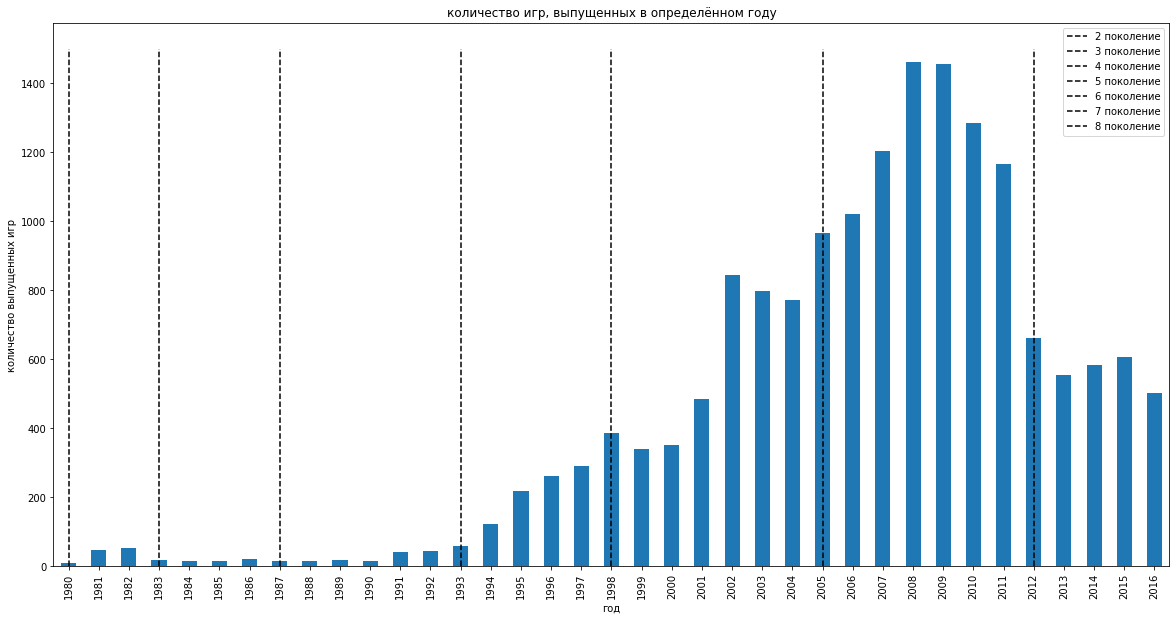

In [59]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20,10))
plt.title('количество игр, выпущенных в определённом году')
plt.xlabel('год')
plt.ylabel('количество выпущенных игр')
plt.plot([0, 0], [0, 1500], "k--")
plt.plot([3, 3], [0, 1500], "k--")
plt.plot([7, 7], [0, 1500], "k--")
plt.plot([13, 13], [0, 1500], "k--")
plt.plot([18, 18], [0, 1500], "k--")
plt.plot([25, 25], [0, 1500], "k--")
plt.plot([32, 32], [0, 1500], "k--")
plt.legend(['2 поколение','3 поколение', '4 поколение', '5 поколение', '6 поколение', '7 поколение', '8 поколение'])
plt.show()

Можно сказать, что есть **4 периода**:
    1. с 1980 по 1993 год: игры выпускаются, но их не оченть много
    2. с 1994 по 2001 год: происходит подъём в индустрии игр, но достаточно плавный, в 1998 году был эдакий выход на плато
    3. с 2002 по 2011 год: резкий скачок с последующим подъёмом до пика в 2009 году, нормализующимся к 2011 году
    4. с 2012 по 2016 год: спад на уровень 2001 года
    
Мои предположения, с чем это могло бы быть связано:
    1. поколения приставок (с этим связано и общее развитие индустрии в техническом плане)
    2. доступность приставок
    3. развитие серий и крупных компаний, укрощающих мини-компании
    
Мне очень интересно проверить гипотезы, поэтому **давайте посмотрим на годы каждого из 8-ми поколений приставок**. Как я помню, у нас в списке нет приставок 1-го поколения, но есть приставки с 2-го по 8-ое.

Я нашёл данные на этой страничке всем известного сайта: https://en.wikipedia.org/wiki/Home_video_game_console

* **2 поколение** – **1976-1992**
* **3 поколение** – **1983-2003**
* **4 поколение** – **1987-2004**
* **5 поколение** – **1993-2005**
* **6 поколение** – **1998-2013**
* **7 поколение** – **2005-2017**
* **8 поколение** – **2012-present**

Я добавил на график линии, когда выходили первые платформы каждого поколения. И практически все изменения поколения платформ объясняют! Кроме одного: что появилось в 2002 году? Моё предположение здесь – это второй фактор, доступность приставок. Если я не ошибаюсь, это может быть связано с распространением ПК и развитием интернета (и то, и другое было раньше, но моменты развития были не сразу).

В общем, мне удалось узнать, что это было связано как раз-таки с развитием ПК: теперь играть на компьютере стало лучше. Вдобавок к этому появился **Stream**, вышли **WoW**, **Counter Strike**. Из-за того, что компьютеры были у людей и так, в отличие от приставок, это больше способствовало развитию этого сектора. Можем даже просто сейчас посмотреть на график количества компьютерных игр по годам.

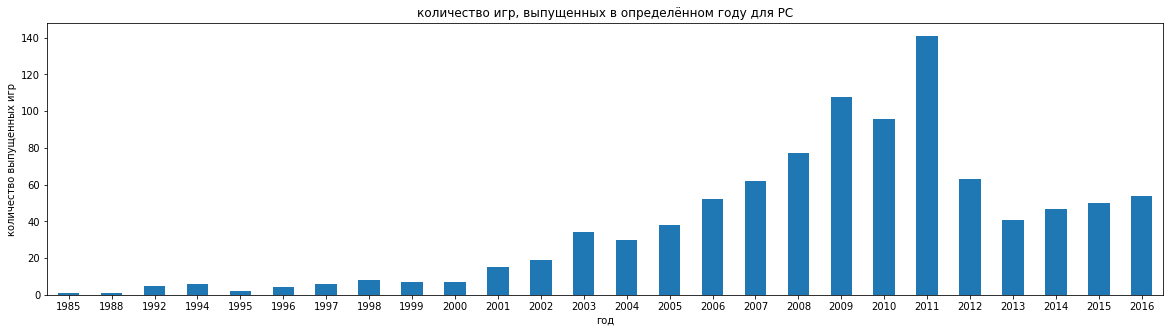

In [60]:
games.query('platform == "PC"').groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20,5))
plt.title('количество игр, выпущенных в определённом году для PC')
plt.xlabel('год')
plt.ylabel('количество выпущенных игр')
plt.xticks(rotation=0, ha='center')
plt.show()

Хм, в 2002 году особо ничего не случилось прям сверхестественного, видимо, здесь какой-то другой ещё фактор есть. Сделаем в нашем первоначальном графике разбивку на платформы. Возьмём для наглядности 10-ку лидеров по всем временам.

In [61]:
games.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).head(10)

,name
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


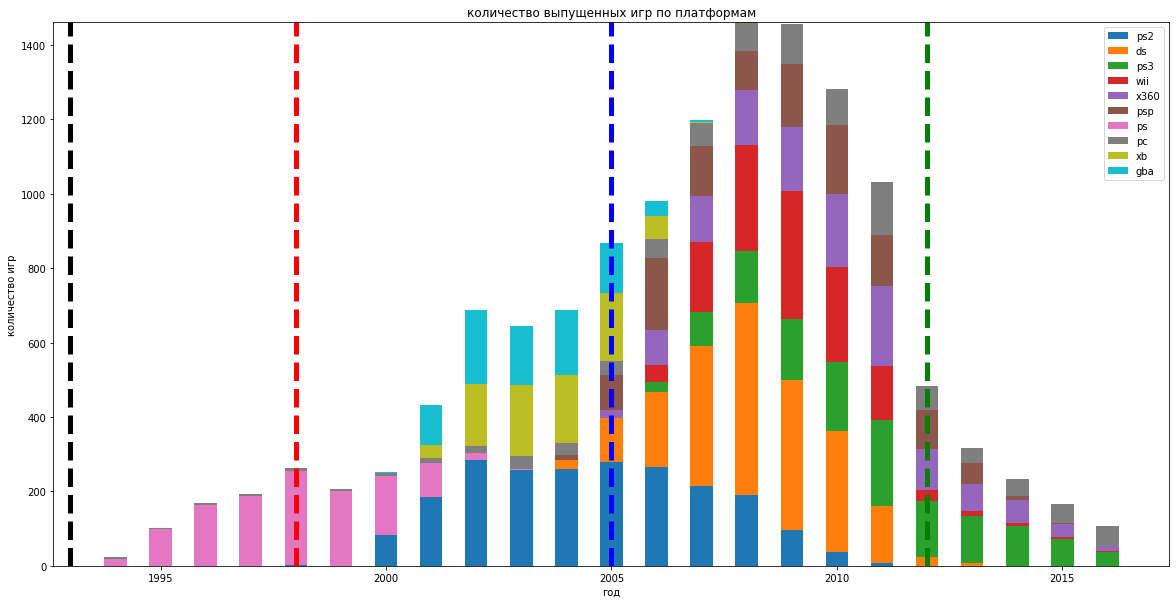

In [62]:
count_plat = games.query('year_of_release > 1993').pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
count_plat.reset_index(inplace=True)
count_plat = count_plat.fillna(0) 

labels = count_plat['year_of_release']

ps2 = count_plat['PS2']
ds = count_plat['DS']
ps3 = count_plat['PS3']
wii = count_plat['Wii']
x360 = count_plat['X360']
psp = count_plat['PSP']
ps = count_plat['PS']
pc = count_plat['PC']
xb = count_plat['XB']
gba = count_plat['GBA']

width = 0.5
fig, ax = plt.subplots(figsize=(20,10))

bars1 = np.add(ps2, ds)
bars2 = np.add(bars1, ps3)
bars3 = np.add(bars2, wii)
bars4 = np.add(bars3, x360)
bars5 = np.add(bars4, psp)
bars6 = np.add(bars5, ps)
bars7 = np.add(bars6, pc)
bars8 = np.add(bars7, xb)

ax.bar(labels, ps2, width, label='ps2')
ax.bar(labels, ds, width, bottom=ps2, label='ds')
ax.bar(labels, ps3, width, bottom=bars1, label='ps3')
ax.bar(labels, wii, width, bottom=bars2, label='wii')
ax.bar(labels, x360, width, bottom=bars3, label='x360')
ax.bar(labels, psp, width, bottom=bars4, label='psp')
ax.bar(labels, ps, width, bottom=bars5, label='ps')
ax.bar(labels, pc, width, bottom=bars6, label='pc')
ax.bar(labels, xb, width, bottom=bars7, label='xb')
ax.bar(labels, gba, width, bottom=bars8, label='gba')

plt.axvline(1993, color='k', linestyle='dashed', linewidth=5)
plt.axvline(1998, color='r', linestyle='dashed', linewidth=5)
plt.axvline(2005, color='b', linestyle='dashed', linewidth=5)
plt.axvline(2012, color='g', linestyle='dashed', linewidth=5)

ax.set_ylabel('количество игр')
ax.set_xlabel('год')
ax.set_title('количество выпущенных игр по платформам')
ax.legend()

plt.show()

Теперь всё стало очень ясно! Скачок в начале нулевых произошёл засчёт притока игр на **PS2**, **XB**, **GBA**. А спад после 2012 года обусловлен общим сокращением количества игр, уходом **DS**, **Wii**. Очень наглядная картинка! Думаю, что мы посмотрим ещё похожий график только с количеством проданных игр. 

Можно сказать по всем представленным в этом разделе данным, что нет большого смысла брать игры за период раньше 1994 года: их выпускалось тогда крайне мало и это совсем олдскул, так сказать. Потом, может быть ещё отсечём, но сейчас пока предлагаю отсечь данные до 1994 года.

In [63]:
games_1 = games.query('year_of_release > 1993')

#### Промежуточный итог

Количество выпускаемых игр связано с поколениями приставок: с появляением новых приставок, количество игр возрастало, но в последние разы это произошло с меньшей амплитудой, видимо, потому что тормозной путь приставок прошлого поколения, так сказать, уменьшился и они быстрее уходят с рынка. Следует ориентироваться на корпорации-произвотелей: **Nintendo**, **SONY**, **Microsoft** и компьютерные, так как у них всегда практически есть приставка нового поколения и это, можно считать, нормальная такая олигополия (несколько участников почтимонополистов). И есть ещё такая тенденция: после выхода новой приставки следует подождать годик, чтобы люди успели её купить, а до этого есть смысл продавать больше игр на старые приставки. В общем, ситуацию с приставками надо мониторить просто, чтобы не закупиться ненужными играми.

<div class="alert alert-success">

**Комментарий ревьюера:** Замечательный анализ, даже перевыполняешь план :)
</div>

<a id="platform"></a>
### Анализ по платформам
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#2017)
 * [к предыдущему подпункту шага 3](#year)

#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

In [64]:
games_tot_sal = games_1.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
games_tot_sal.reset_index(inplace=True)
top_platforms = games_tot_sal['platform']

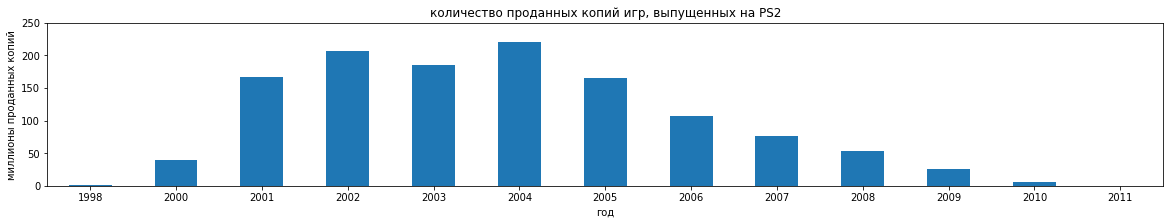

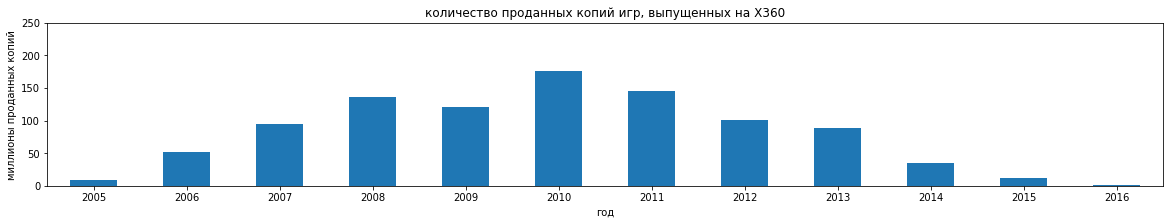

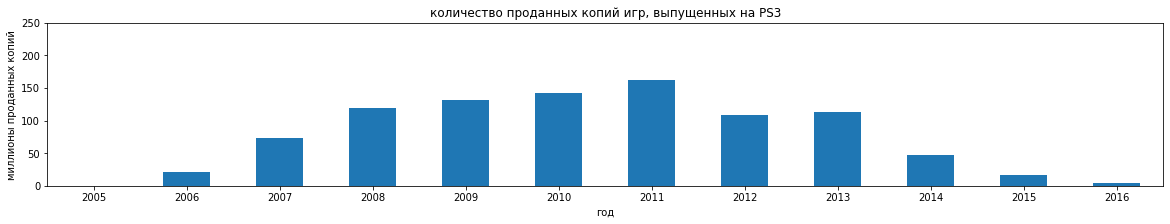

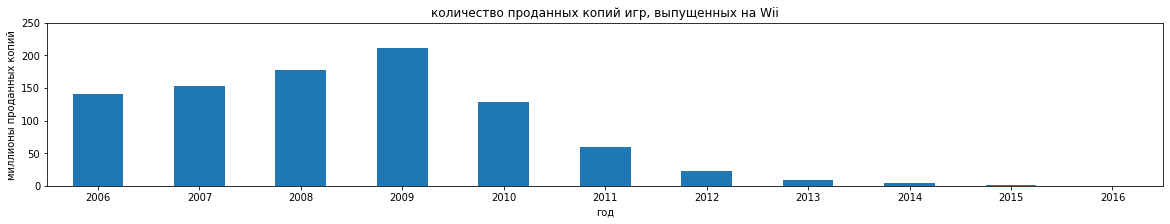

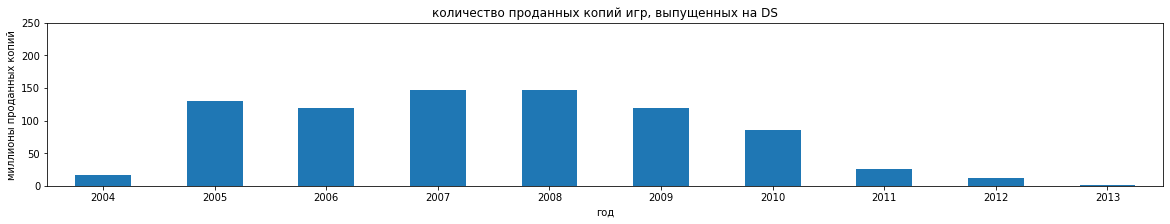

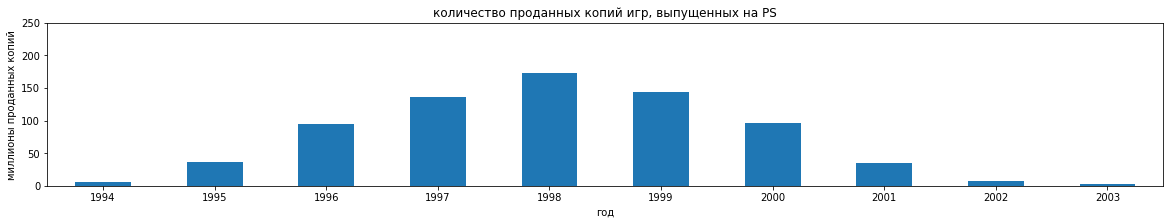

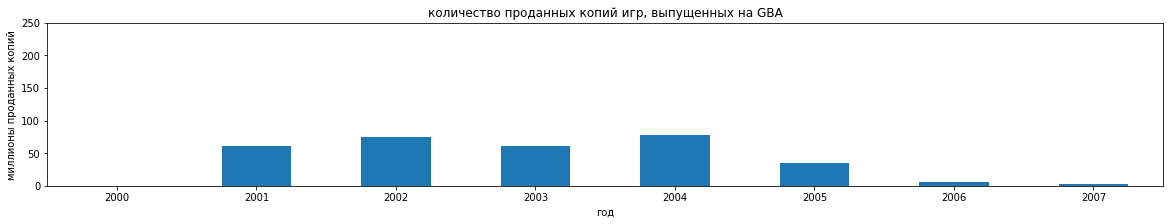

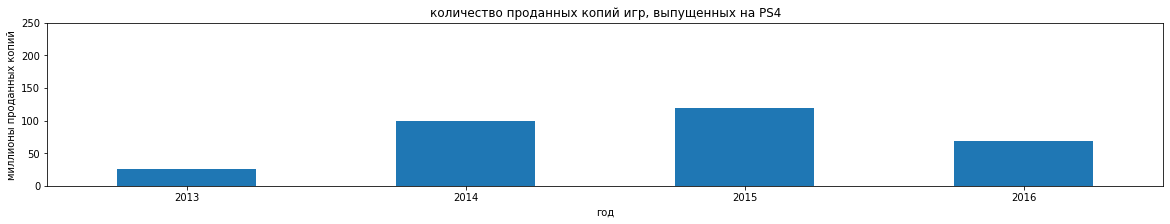

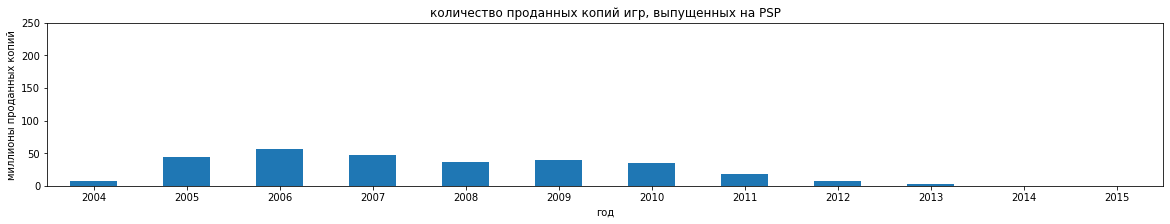

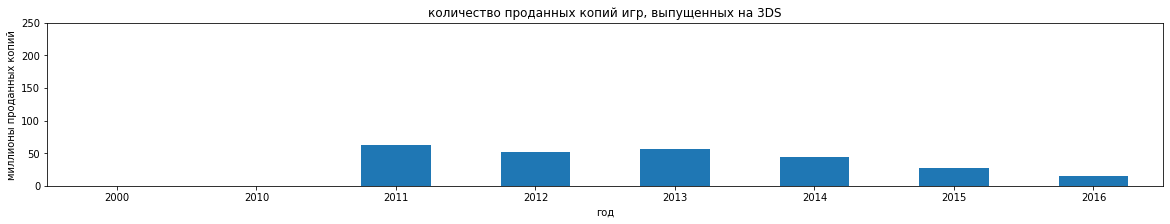

In [65]:
for i in top_platforms:
    games_1[games_1['platform'] == i].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(20,3))
    plt.title('количество проданных копий игр, выпущенных на '+ i)
    plt.xlabel('год')
    plt.ylabel('миллионы проданных копий')
    plt.ylim(0, 250)
    plt.xticks(rotation=0, ha='center')
    plt.show()
    plt.close()

У большинства приставок типичный вид графика похож на нормальный (я тут скорее про форму, чем про содержание, потому что тут «нормальность» события совсем необязательна): увеличение спроса и его спад под конец популярности, но есть несколько исключений в нашем датасете:
1. Wii, GBA, 3DS, cразу стартанули с больших показателей
2. PS4 до сих пор популярна, поэтому у неё нет спада
3. платформы различаются по поведению: сколько времени понадобилось для полноценного подъёма, сколько для спуска, сколько были на верхнем плато

Давайте посмотрим, **сколько каждая из этих платформ была на рынке**.

In [66]:
games_1.pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: len(x.unique())).sort_values(by='year_of_release', ascending=False).head(10)

,year_of_release
platform,
PC,23
PS2,13
X360,12
PS3,12
PSP,12
Wii,11
DS,10
PS,10
XB,9


In [67]:
games_1.query('platform != "PC"').pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: len(x.unique())).mean()

year_of_release    6.206897
dtype: float64

In [68]:
games_1.query('platform != "PC"').pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: len(x.unique())).sort_values(by='year_of_release', ascending=False).head(10).mean()

year_of_release    10.5
dtype: float64

Хотя компьютерные игры и дольше всего находятся в рейтингах (и вряд ли исчезнут (**sic!**)), это не значит, что они в топ-10 популярных платформ, однако. Не считая их список примерно совпадает со списком самых популярных платформ. **В среднем приставка присутствует на рынке порядка 6 лет, а у топ-10 – 10 лет.** PC мы не считали, потому что это выбивающееся значение.

Общее распределение по годам с топ-10 платформ мы построили в предыдущем разделе и там объяснили, чем обусловлена их сменяемость.

#### За какой характерный срок появляются новые и исчезают старые платформы?

Как уже было отмечено выше, **в среднем порядка 10 лет существует одна платформа (если это платформа из топ-10) или 6 лет**, компьютер мы не учитывали, так как это исключительный случай и вообще не такой объективный критерий, так как поколения компьютеров сменяются. **Предлагаю взглянуть на то, с какой периодичностью в среднем появляется новая платформа**, то есть мы возьмём разницу между первыми годами платформ.

Дальше представлено много вычислений и может показаться, что они лишние, но у меня правда никак по-другому не удалось выбить данные так, чтобы каждому году показывалось количество выпущенных приставок. Очень просто было получить данные для годов, когда хоть одна приставка выпускалась, но я хотел, чтобы нулевые года тоже учитывались, поэтому таким вот способом этого и добился.

In [69]:
plt_min_y = games.pivot_table(index='platform', values='year_of_release', aggfunc='min')
plt_min_y.reset_index(inplace=True)
plt_per_year = pd.DataFrame(plt_min_y.groupby('year_of_release')['platform'].count())
plt_per_year.reset_index(inplace=True)
yer = {'year' : range(1980, 2017), 'amount' : 0}
yer = pd.DataFrame(data=yer)

In [70]:
def ppy(year):
    if year in plt_per_year['year_of_release'].unique():
        return int(plt_per_year[plt_per_year['year_of_release'] == year]['platform'])
    return 0

In [71]:
yer['amount_2'] = yer['year'].map(ppy)
yer = yer[['year', 'amount_2']]

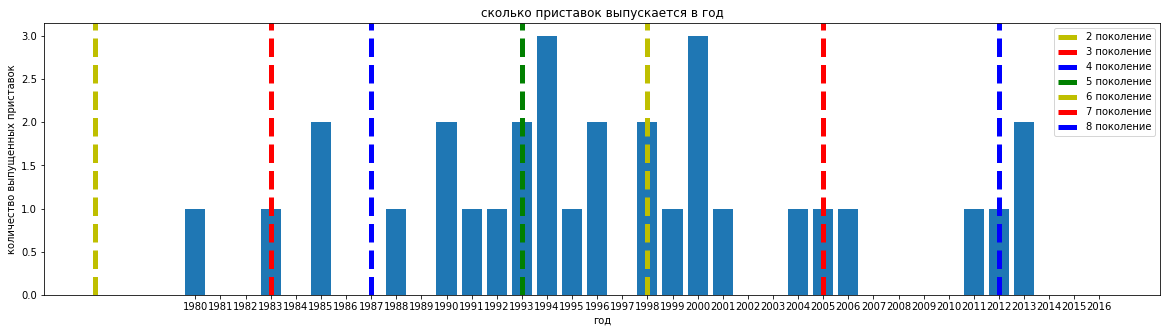

In [72]:
plt.figure(figsize=(20,5))
plt.bar(x=yer['year'], height=yer['amount_2'])
plt.xticks(yer['year'])
plt.title('сколько приставок выпускается в год')
plt.xlabel('год')
plt.ylabel('количество выпущенных приставок')
plt.axvline(1976, color='y', linestyle='dashed', linewidth=5)
plt.axvline(1983, color='r', linestyle='dashed', linewidth=5)
plt.axvline(1987, color='b', linestyle='dashed', linewidth=5)
plt.axvline(1993, color='g', linestyle='dashed', linewidth=5)
plt.axvline(1998, color='y', linestyle='dashed', linewidth=5)
plt.axvline(2005, color='r', linestyle='dashed', linewidth=5)
plt.axvline(2012, color='b', linestyle='dashed', linewidth=5)
plt.legend(['2 поколение','3 поколение', '4 поколение', '5 поколение', '6 поколение', '7 поколение', '8 поколение'])
plt.show()

Видно, что выход платформ тесно связан с появлением новых поколений игр, что очевидно. **Максимум платформ выходит 3 штуки**, в последние годы промежутки между выходами платформ стали больше (**с 2006 по 2011 не выходили игры, в то время как в последнии разы разница между рядом стоящими годами были максимум 3 года**).

#### Промежуточный итог

В среднем **приставка присутствует на рынке порядка 6 лет, а у топ-10 – 10 лет**. Максимум платформ выходит 3 штуки в год, **в последние годы промежутки между выходами платформ стали больше** (с 2006 по 2011 не выходили игры, в то время как в последнии разы разница между рядом стоящими годами были максимум 3 года).

<a id="2017"></a>
### Анализ по актуальному периоду
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#without)
 * [к предыдущему подпункту шага 3](#platform)

В качестве акутального периода **я решил взять данные после 2011 года**, потому что это момент, **когда начали появляться приставки последнего, 8-го поколени**я. Конечно, хотелось бы проанализировать период и до, но, для того чтобы создать методологию оценки, стоит как-то ограничить данные, ведь предпочтения менялись, а **последние 5 лет – более менее маленький промежуток, но уверенно оформленный, по которому можно что-то сказать**. 

In [73]:
games_8 = games.query('year_of_release > 2011')

<a id="potential"></a>
### Выбор потенциально прибыльных платформ
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#global)
 * [к предыдущему подпункту шага 3](#without)

Посмотрим на дианамику по годам: **чем темнее, тем больше продаж, чем «салатнее», тем меньше, белый цвет – отсутствие продаж**.

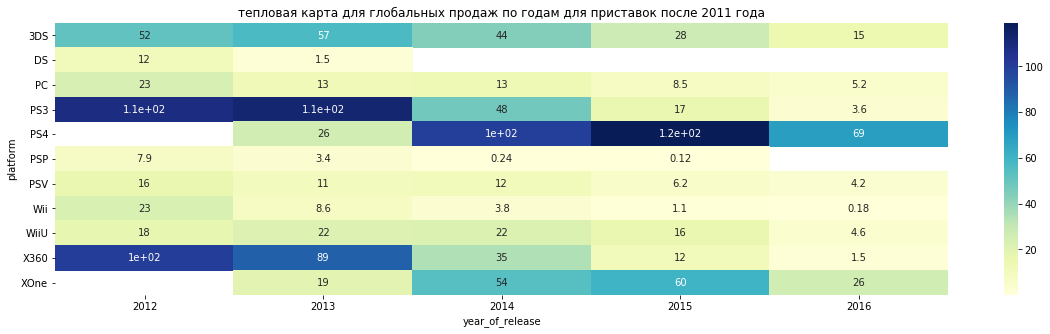

In [74]:
plat_year_sale = games_8.pivot_table(index='platform', values='total_sales', columns='year_of_release', aggfunc='sum')
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.heatmap(plat_year_sale, annot=True, cmap="YlGnBu")
plt.title('тепловая карта для глобальных продаж по годам для приставок после 2011 года')
plt.show()

На данном этапе (в сравнении 2015 года с предыдущими, 2016-ый мы полуиспользуем, так как по нему недостаточно данных, как следует из условия проекта) растут продажи игр платформ **PS4** и **XOne**, что не удивительно, так как это платформы 8-го поколения. Остальные платформы стремительно падают в продажах, лидер из предыдущего поколения – **PS3** завершает свой триумф, уступая место **PS4**.

Следовательно, стоит делать акцент на играх платформ последнего, 8-го поколения. Создадим столбец с показателем поколения, чтобы использовать этот параметр в дальнейшем. А с помощью этой колонки сделаем такой же график только для игр 8-го поколения.

In [75]:
dic_3 = {'3DS' : 8, 'DS' : 7, 'PC' : 6, 'PS3' : 7, 'PS4' : 8, 'PSP' : 7,
       'PSV' : 8, 'Wii' : 7, 'WiiU' : 8, 'X360' : 7, 'XOne' : 8}

In [76]:
games_8['gen'] = games_8['platform'].map(dic_3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


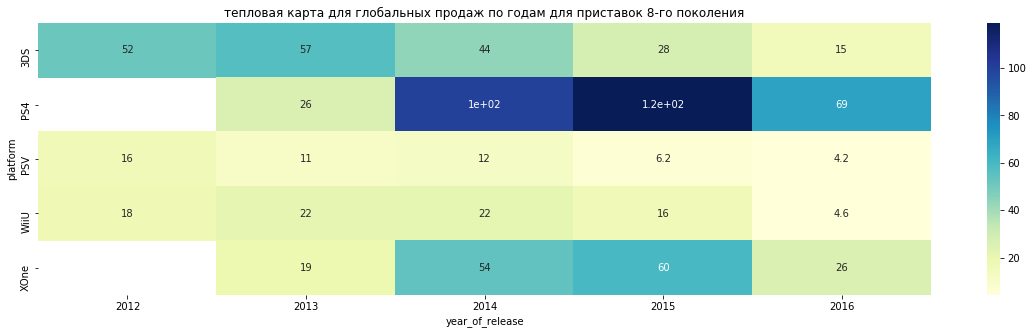

In [77]:
plat_year_sale_8 = games_8.query('gen == 8').pivot_table(index='platform', values='total_sales', columns='year_of_release', aggfunc='sum')
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.heatmap(plat_year_sale_8, annot=True, cmap="YlGnBu")
plt.title('тепловая карта для глобальных продаж по годам для приставок 8-го поколения')
plt.show()

Класс! По этим играм и правда самые топовые значения за последние годы и стоит акцент делать на них, конечно. Сразу отмечу для анализа вообще: **если бы у нас появились данные, что скоро выходят новые платформы, то акцент лучше постепенно на них смещать, в первые годы их выхода не так сильно соскакивать на них, в зависимости от экономической ситуации (возможности людей покупать приставки), а в последующие уже делать на них упор**. А в нашей ситуации и правда лучше делать ставки на оставшиеся сливки с платформ 8-го поколения. Причём, не надо забывать, что здесь очень разные приставки, часть из которых не противоречит друг другу: **3DS** и **PSV** – портативные игровые приставки, а компьютер – это компьютер. В каком-то более подробном анализе следовало бы делать отдельный упор на каждую категорию, но для нас, всё же не очень это важно, будем брать количеством.

#### Промежуточный итог

Мы выбрали актуальным промежутком – промежуток от 2012 года, когда появились приставки последнего поколения. А самые продаваемые приставки для нас – 8-го поколения. Это видно и из данных: погодовых продаж по этим приставкам.

<div class="alert alert-success">

**Комментарий ревьюера:** Красивые и понятные графики 👏
</div>

<a id="global"></a>
### Анализ глобальных продаж по платформам
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#cor)
 * [к предыдущему подпункту шага 3](#potential)

In [ ]:
for platform in games_8.query('gen == 8')['platform'].unique():
    plt.figure(figsize=(4,4))
    games_8[games_8['platform'] == platform]['total_sales'].plot(kind='box')
    plt.ylim(0, 14)
    plt.title('ящик с усами для глобальных продаж на платформе ' + platform)
    plt.ylabel('миллионы проданных копий')
    plt.show()
    plt.close()

По «ящикам с усами» видно, что наибольший разброс у **PS4** и **3DS**, самые большие **IQR** у **PS4** и **XOne**. Значит, **основные тенденции задают приставки из первой тройки**.

<a id="cor"></a>
### Корреляция между отзывами и продажами
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#comp)
 * [к предыдущему подпункту шага 3](#global)

Выберем одну из приставок и посмотрим, как на неё влияют отзывы критиков и пользователей. Предлагаю взять лидера – **PS4**. Для начала построим диаграмы рассеяния для каждого типа отзывов и общих продаж.

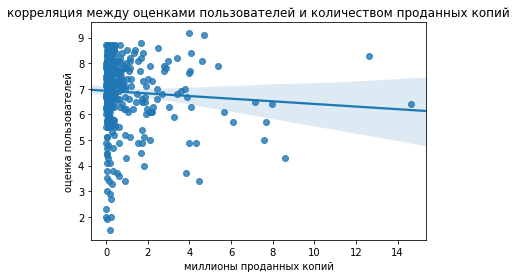

корреляция: -0.0038086177105584084


In [79]:
sns.regplot(x="total_sales", y="user_score", data=games_8.query('platform == "PS4"  & user_score != -1'))
plt.title('корреляция между оценками пользователей и количеством проданных копий')
plt.xlabel('миллионы проданных копий')
plt.ylabel('оценка пользователей')
plt.show()
print('корреляция:', games_8.query('platform == "PS4"')['total_sales'].corr(games_8.query('platform == "PS4"')['user_score']))

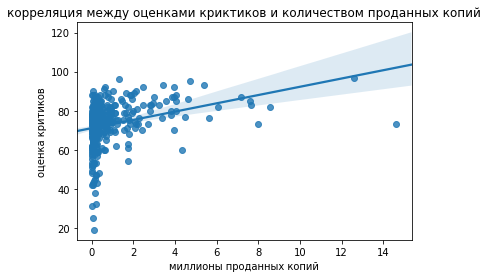

корреляция: 0.3145273442563955


In [80]:
sns.regplot(x="total_sales", y="critic_score", data=games_8.query('platform == "PS4"'))
plt.title('корреляция между оценками криктиков и количеством проданных копий')
plt.xlabel('миллионы проданных копий')
plt.ylabel('оценка критиков')
plt.show()
print('корреляция:', games_8.query('platform == "PS4"')['total_sales'].corr(games_8.query('platform == "PS4"')['critic_score']))

В общем, в первом случае вообще не пойми что без какой-либо корреляции между параметрами, а во втором слабая положительная корреляция. Предлагаю посмотреть на результат, если мы уберём очень выбивающиеся значения и посмотрим на корреляцию с играми до 6 миллионов проданных копий.

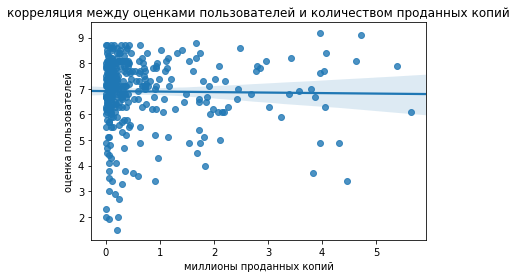

корреляция: 0.04318663633630422


In [81]:
sns.regplot(x="total_sales", y="user_score", data=games_8.query('platform == "PS4" & total_sales <= 6 & user_score != -1'))
plt.title('корреляция между оценками пользователей и количеством проданных копий')
plt.xlabel('миллионы проданных копий')
plt.ylabel('оценка пользователей')
plt.show()
print('корреляция:', games_8.query('platform == "PS4"')['total_sales'].corr(games_8.query('platform == "PS4" & total_sales <= 6')['user_score']))

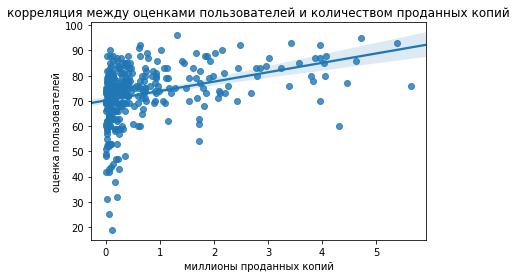

корреляция: 0.3503037985781876


In [82]:
sns.regplot(x="total_sales", y="critic_score", data=games_8.query('platform == "PS4" & total_sales <= 6'))
plt.title('корреляция между оценками пользователей и количеством проданных копий')
plt.xlabel('миллионы проданных копий')
plt.ylabel('оценка пользователей')
plt.show()
print('корреляция:', games_8.query('platform == "PS4" & total_sales <= 6')['total_sales'].corr(games_8.query('platform == "PS4" & total_sales <= 6')['critic_score']))

В общем, корреляция немного увеличилась, но не особо. В общем, для этой приставки как будто бы нет ограничения на положительные отзывы (они есть на играх практически со всеми количествами проданных копий), но, при этом видно отчётливо, что у очень популярных игр обычно рейтинги повыше и меньше суматохи, **но корреляция и правда совсем маленькая...** 

Не могу удержаться и хочу посмотреть корреляцию отзывов критиков и пользователей для этой игры.

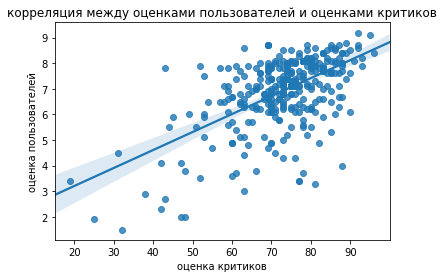

корреляция: 0.4529597237292103


In [83]:
sns.regplot(x="critic_score", y="user_score", data=games_8.query('platform == "PS4" & total_sales <= 6  & user_score != -1'))
plt.title('корреляция между оценками пользователей и оценками критиков')
plt.xlabel('оценка критиков')
plt.ylabel('оценка пользователей')
plt.show()
print('корреляция:', games_8.query('platform == "PS4" & total_sales <= 6')['critic_score'].corr(games_8.query('platform == "PS4" & total_sales <= 6')['user_score']))

Здорово! Хоть где-то есть правда и тут видно не очень сильную, но и не очень слабую корреляцию между оценками, что говорит о том, что народ, в принципе, не обманешь (либо наоборот обманешь так, что все ставят примерно такие же оценки, как и критики).

#### Промежуточный итог

Я выбрал для анализа лидера рынка - **PS4**, посмотрел на диаграмы рассеивания отзывов и продаж, посчитал корреляцию и получил такие результаты:
1. отзывы пользователей слабо коррелируют с общими продажами (практически не коррелируют)
2. отзывы критиков имеют близкую к средней положительной оценке корреляцию, но, опять же, не очень сильную

**Следует обращать внимание на отзывы (критиков), но это не очень сильный фактор, как бы ни казалось.**

<a id="comp"></a>
### Соотнесение выводов с продажами на других платформах
 * [к оглавлению шага 3](#research)
 * [к следующему подпункту шага 3](#genre)
 * [к предыдущему подпункту шага 3](#cor)

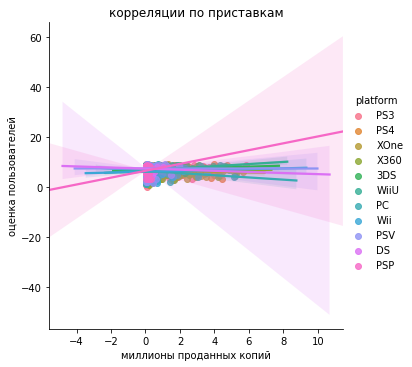

корреляция на PS3 : 0.13698297872503162
корреляция на X360 : 0.12834717576614585
корреляция на PS4 : 0.04318663633630422
корреляция на 3DS : 0.16502235930161716
корреляция на DS : 0.08657421730995363
корреляция на XOne : 0.053086429104101156
корреляция на WiiU : 0.264283720620124
корреляция на Wii : 0.3353239555105969
корреляция на PC : -0.07748993215953025
корреляция на PSV : 0.016948742183013128
корреляция на PSP : -0.10287611444746832


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [84]:
sns.lmplot(x="total_sales", y="user_score", hue='platform', data=games_8.query('user_score != -1 & total_sales <= 6'))
plt.title('корреляции по приставкам')
plt.xlabel('миллионы проданных копий')
plt.ylabel('оценка пользователей')
plt.show()
for i in games_8['platform'].unique():
    print('корреляция на', i,':',games_8.query('total_sales <= 6')[games_8['platform'] == i]['total_sales'].corr(games_8.query('total_sales <= 6')[games_8['platform'] == i]['user_score']))

В целом практически у всех слабая корреляция, немного сильнее, чем у остальынх у **Wii**, **WiiU**, **3DS**, продуктов **Nintendo**.

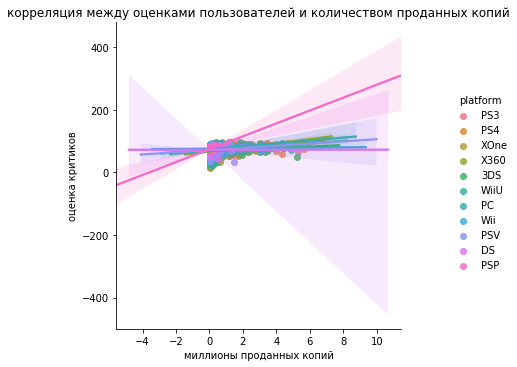

корреляция на PS3 : 0.33024913331154615
корреляция на X360 : 0.39747240768269204
корреляция на PS4 : 0.3503037985781876
корреляция на 3DS : 0.17401935631362278
корреляция на DS : 0.04297131773606577
корреляция на XOne : 0.33978330416956537
корреляция на WiiU : 0.27065164376885437
корреляция на Wii : 0.18883213542525143
корреляция на PC : 0.22377143926234302
корреляция на PSV : 0.09720092353572622
корреляция на PSP : 0.29529715468704354


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [85]:
sns.lmplot(x="total_sales", y="critic_score", hue='platform', data=games_8.query('user_score != -1 & total_sales <= 6'))
plt.title('корреляция между оценками пользователей и количеством проданных копий')
plt.xlabel('миллионы проданных копий')
plt.ylabel('оценка критиков')
plt.show()
for i in games_8['platform'].unique():
    print('корреляция на', i,':', games_8.query('total_sales <= 6')[games_8['platform'] == i]['total_sales'].corr(games_8.query('total_sales <= 6')[games_8['platform'] == i]['critic_score']))

Можем увидеть, что наибольшая корреляция с **X360**, остальные немного отличаются, но в целом корреляция имеют схожий характер у всех.

#### Промежуточный итог

По остальным платформам корреляция с оценками относительно схожая.

<a id="genre"></a>
### Распределение игр по жанрам
 * [к оглавлению шага 3](#research)
 * [к предыдущему подпункту шага 3](#comp)

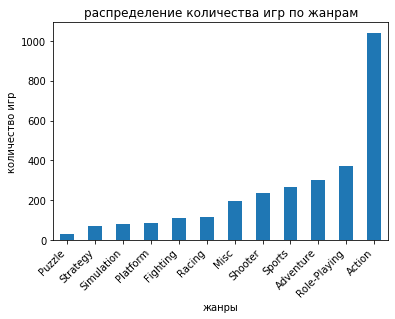

In [86]:
games_8.groupby('genre')['name'].count().sort_values().plot(kind='bar')
plt.title('распределение количества игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('количество игр')
plt.xticks(rotation=45, ha='right')
plt.show()

По количеству игр видно, что явный лидер – **Action**, за ним остальные игры распределены более равномерно в таком порядке: **Role-Playing**, **Adventure**, **Sports**, **Shooter** и так далее. Остальных выпускается гораздо меньше.

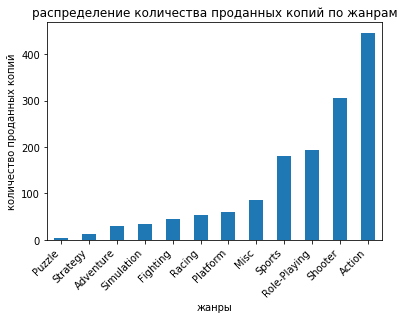

In [87]:
games_8.groupby('genre')['total_sales'].sum().sort_values().plot(kind='bar')
plt.title('распределение количества проданных копий по жанрам')
plt.xlabel('жанры')
plt.ylabel('количество проданных копий')
plt.xticks(rotation=45, ha='right')
plt.show()

Первая четвёрка явно выделяется (в сравнении с предыдущим графиком, **Adventure** ушёл вниз по показателям) и повторяет лидерские позиции по количествам выпущенных игр: **Action**, **Shooter**, **Role-Playing**, **Sports**.

Можно точно утверждать, что есть две группы по жанрам: первая четвёрка и остальные, они явно разделяеются по продажам. Если говорить о совсем выделяющихся значениях, то, в принципе, все значение нормально распределены и не выделяются очень сильно (как **Action** в первом графике), но безусловно: **Action** – лидер, **Puzzle** – аутсайдер.

Ради собственного интереса хотел бы посмотреть на топ-5 игр в каждом жанре.

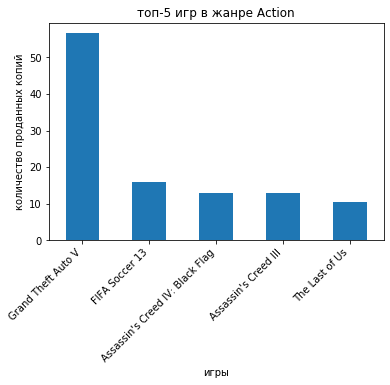

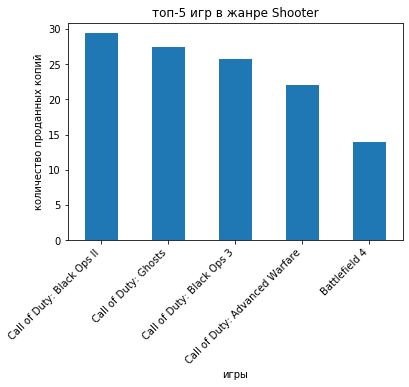

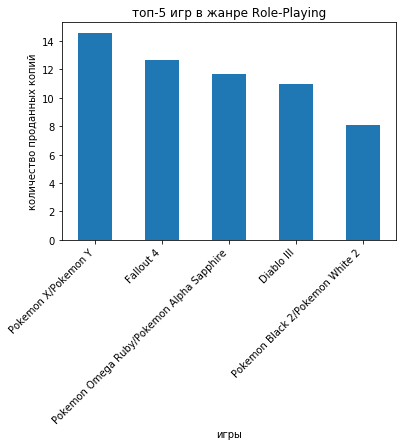

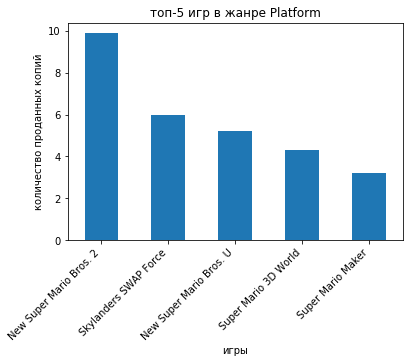

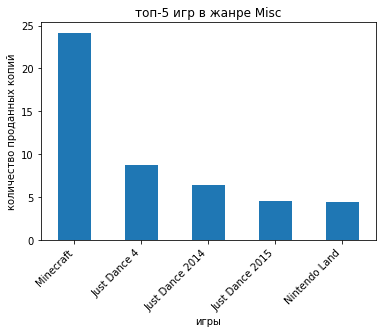

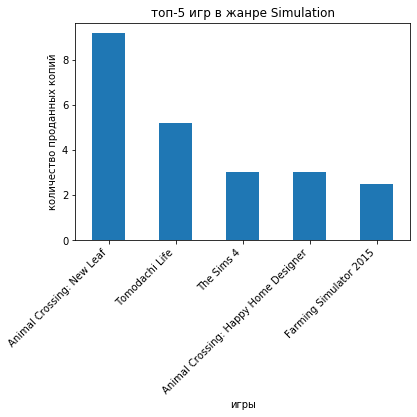

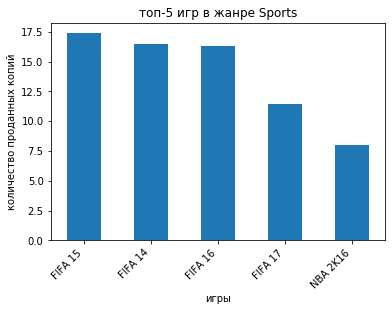

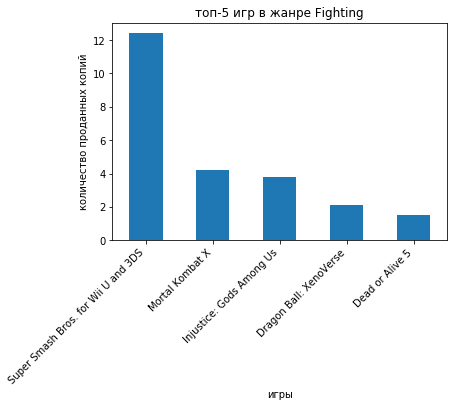

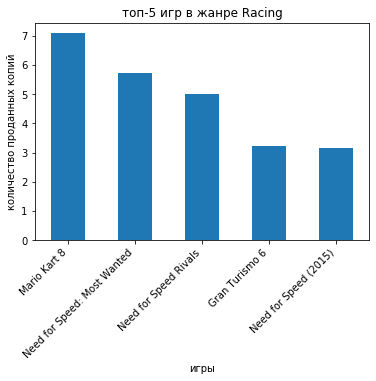

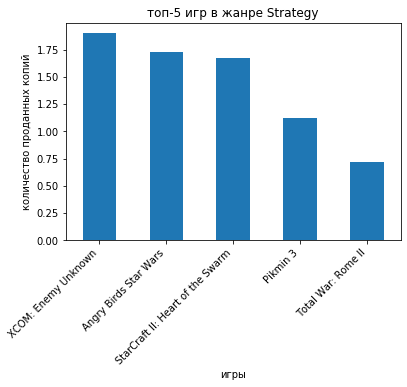

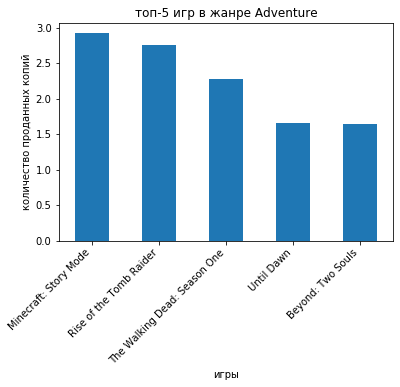

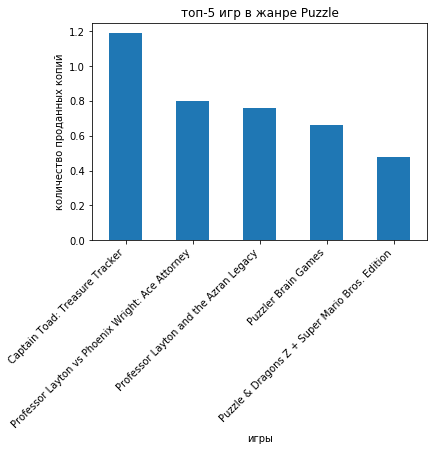

In [88]:
for genre in games_8['genre'].unique():
    games_8[games_8['genre'] == genre].groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
    plt.title('топ-5 игр в жанре ' + genre)
    plt.xlabel('игры')
    plt.ylabel('количество проданных копий')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    plt.close()

А какие самые популярные топ-10 игр и их жанры?

In [89]:
games_8.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)

name
Grand Theft Auto V                56.58
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
FIFA 15                           17.37
FIFA 14                           16.46
FIFA 16                           16.30
FIFA Soccer 13                    15.97
Name: total_sales, dtype: float64

GTA - **Action**, CoD – **Shooter**, Minecraft – **Misc**, FIFA – **Sports**.

#### Промежуточный итог

По количеству игр видно, что явный лидер – **Action**, за ним остальные игры распределены более равномерно в таком порядке: **Role-Playing, Adventure, Sports, Shooter** и так далее. Остальных выпускается гораздо меньше. Можно точно утверждать, что есть две группы по жанрам, если говорить о продажах: первая четвёрка и остальные, они явно разделяеются по продажам. Если говорить о совсем выделяющихся значениях, то, в принципе, все значение нормально распределены и не выделяются очень сильно (как **Action** в графике колтичества игр), но безусловно: **Action** – лидер, **Puzzle** – аутсайдер.

<a id="sum_3"></a>
## Вывод
 * [к началу шага](#research)

Количество выпускаемых игр связано с поколениями приставок: с появляением новых приставок, количество игр возрастало, но в последние разы это произошло с меньшей амплитудой, видимо, потому что тормозной путь приставок прошлого поколения, так сказать, уменьшился и они быстрее уходят с рынка. Следует ориентироваться на корпорации-произвотелей: **Nintendo**, **SONY**, **Microsoft** и компьютерные, так как у них всегда практически есть приставка нового поколения и это, можно считать, нормальная такая олигополия (несколько участников почтимонополистов). И есть ещё такая тенденция: после выхода новой приставки следует подождать годик, чтобы люди успели её купить, а до этого есть смысл продавать больше игр на старые приставки. В общем, ситуацию с приставками надо мониторить просто, чтобы не закупиться ненужными играми.

В среднем **приставка присутствует на рынке порядка 6 лет, а у топ-10 – 10 лет**. Максимум платформ выходит 3 штуки в год, **в последние годы промежутки между выходами платформ стали больше** (с 2006 по 2011 не выходили игры, в то время как в последнии разы разница между рядом стоящими годами были максимум 3 года).

Мы выбрали актуальным промежутком – промежуток от 2012 года, когда появились приставки последнего поколения. А самые продаваемые приставки для нас – 8-го поколения. Это видно и из данных: погодовых продаж по этим приставкам.

По «ящикам с усами» видно, что наибольший разброс у **PS4** и **3DS**, самые большие **IQR** у **PS4** и **XOne**. Значит, **основные тенденции задают приставки из первой тройки**.

Я выбрал для анализа лидера рынка - **PS4**, посмотрел на диаграмы рассеивания отзывов и продаж, посчитал корреляцию и получил такие результаты:
1. отзывы пользователей слабо коррелируют с общими продажами (практически не коррелируют)
2. отзывы критиков имеют близкую к средней положительной оценке корреляцию, но, опять же, не очень сильную

**Следует обращать внимание на отзывы (критиков), но это не очень сильный фактор, как бы ни казалось.**

По остальным платформам корреляция с оценками относительно схожая.

По количеству игр видно, что явный лидер – **Action**, за ним остальные игры распределены более равномерно в таком порядке: **Role-Playing, Adventure, Sports, Shooter** и так далее. Остальных выпускается гораздо меньше. Можно точно утверждать, что есть две группы по жанрам, если говорить о продажах: первая четвёрка и остальные, они явно разделяеются по продажам. Если говорить о совсем выделяющихся значениях, то, в принципе, все значение нормально распределены и не выделяются очень сильно (как **Action** в графике колтичества игр), но безусловно: **Action** – лидер, **Puzzle** – аутсайдер.

<div class="alert alert-success">

**Комментарий ревьюера:** Великолепно, видно что ты горишь этим делом и вникаешь в суть каждой находки и в совершенстве владеешь всеми необходимыми инструментами. Продолжай в том же духе!
</div>

<a id="port"></a>
## Шаг 4. Составление портрета пользователя каждого региона
 * [к оглавлению](#first)
 * [к выводу](#sum_4)
 * [к следующему шагу](#hyp)
 * [к предыдущему шагу](#research)
 
1. [Самые популярные платформы (топ-5)](#top_plat)
2. [Самые популярные жанры (топ-5)](#top_genre)
3. [Влияние рейтинга ESRB на продажи в отдельном регионе](#esrb)

Отчасти я уже смотрел на эти показатели для всех регионов, но сейчас проведу межрегиональный анализ. Всего регионов четыре: **NA**, **EU**, **JP**, Северная Америка, Европа, Япония. Они представлены соответственно **na_sales**, **eu_sales**, **jp_sales**.

<a id="top_plat"></a>
### Самые популярные платформы (топ-5)
 * [к оглавлению шага 4](#port)
 * [к следующему подпункту шага 4](#top_genre)

Посмотрим для начала, сколько вообще есть продажи для каждой платформы в каждом регионе, а потом уже посмотрим отдельно в долях.

In [90]:
games_8.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc=sum).sort_values('total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,141.09,15.96,108.74,314.14
PS3,107.27,35.29,103.74,289.71
X360,74.89,1.57,140.57,237.52
3DS,42.85,87.82,55.87,195.48
XOne,51.59,0.34,93.12,159.32
WiiU,25.13,13.01,38.10,82.19
PC,38.38,0.00,19.26,63.51
PSV,11.41,21.11,11.09,49.44
Wii,12.34,3.39,18.14,36.60


Теперь посмотрим на топ-5 платформ в каждом регионе.

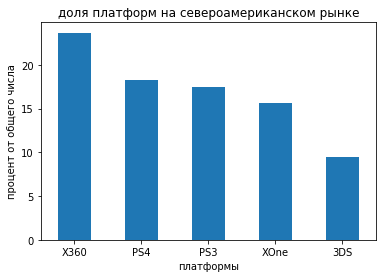

In [91]:
na = games_8.groupby('platform')['na_sales'].sum()
na_percent = na / na.sum() * 100
na_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('доля платформ на североамериканском рынке')
plt.xlabel('платформы')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=0, ha='center')
plt.show()

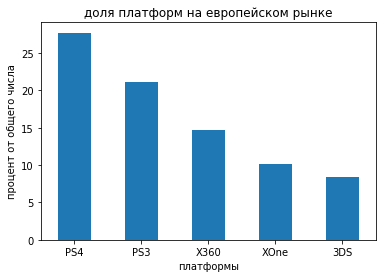

In [92]:
eu = games_8.groupby('platform')['eu_sales'].sum()
eu_percent = eu / eu.sum() * 100
eu_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('доля платформ на европейском рынке')
plt.xlabel('платформы')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=0, ha='center')
plt.show()

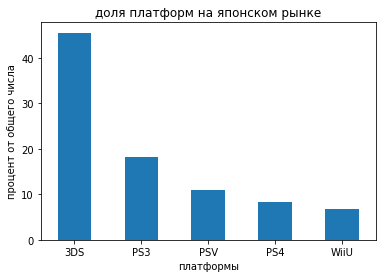

In [93]:
jp = games_8.groupby('platform')['jp_sales'].sum()
jp_percent = jp / jp.sum() * 100
jp_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('доля платформ на японском рынке')
plt.xlabel('платформы')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=0, ha='center')
plt.show()

Североамериканский рынок:
    1. в лидерах продукт местного производства, но прошлого поколения, X360 с долей ~25%
    2. долевые позиции первой пятёрки находятся совсем рядом
    3. портативные приставки на 5 месте
    
Европейский рынок:
    1. в лидерах PS4, за ним PS3 с долями около 20% с лишним
    2. долевые позиции первой пятёрки находятся рядом, но не так близко, как в североамерианском сегменте
    3. портативные приставки на 5 месте
    
Японский рынок:
    1. в лидерах продукт местного производства 3DSс долей ~45% !!!
    2. большой отрыв 1 места от остальных, остальные более равномерны; в пятёрке нет неазиатских производителей
    3. портативные приставки на 1 месте

#### Промежуточный итог

На **североамериканском и европейском рынках** большая часть покупает игры для **непортативных приставок**, в **Америке** отдаётся предпочтение своему производителю – **Xbox**, но и там, и там есть **Sony в лидерах**.

На **японском рынке** практически **половина продаж** для местной портативной приставки – **3DS**. **Остальные** тоже местные – **Sony**.

<a id="top_genre"></a>
### Самые популярные жанры (топ-5)
 * [к оглавлению шага 4](#port)
 * [к следующему подпункту шага 4](#esrb)
 * [к предыдущему подпункту шага 4](#top_plat)

Снова посмотрим на ситуацию целиком.

In [94]:
games_8.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc=sum).sort_values('total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,161.70,52.80,180.15,446.41
Shooter,113.49,9.23,144.83,304.82
Role-Playing,48.58,65.54,64.11,193.09
Sports,69.09,8.01,81.53,181.07
Misc,26.32,13.10,38.19,85.28
Platform,21.41,8.63,25.38,61.00
Racing,27.29,2.50,17.30,53.59
Fighting,10.79,9.44,19.79,44.49
Simulation,14.55,10.41,8.15,35.31


Ну а теперь посмотрим на топ-5 по долям для каждого региона.

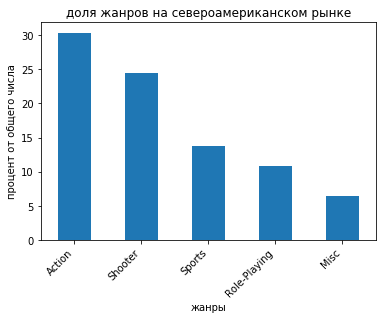

In [95]:
na = games_8.groupby('genre')['na_sales'].sum()
na_percent = na / na.sum() * 100
na_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('доля жанров на североамериканском рынке')
plt.xlabel('жанры')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=45, ha='right')
plt.show()

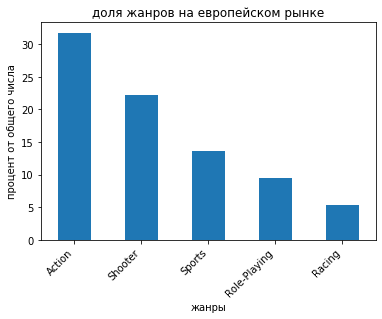

In [96]:
eu = games_8.groupby('genre')['eu_sales'].sum()
eu_percent = eu / eu.sum() * 100
eu_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('доля жанров на европейском рынке')
plt.xlabel('жанры')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=45, ha='right')
plt.show()

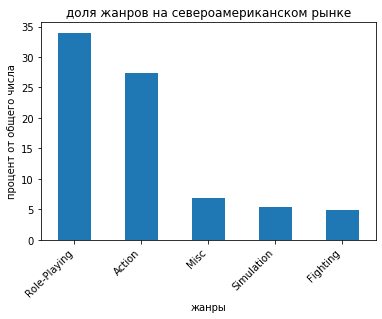

In [97]:
jp = games_8.groupby('genre')['jp_sales'].sum()
jp_percent = jp / jp.sum() * 100
jp_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('доля жанров на североамериканском рынке')
plt.xlabel('жанры')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=45, ha='right')
plt.show()

Североамериканский рынок:
    1. в лидерах Action с ~30%
    2. долевые позиции первой пятёрки находятся совсем рядом, не сильно отличается от общей картины
    
Европейский рынок:
    1. ситуация практически аналогична североамериканской, похожие предпочтения у пользователей
    2. разница: в Америке больше любят играть в Minecraft, в Европе – в гонки
    
Японский рынок:
    1. очень непохожий на соседей рынок, общее – Action на втором месте (почти лидер)
    2. разница: на первом месте Role-Playing из-за игры Pokemon X/Y и остальных, есть Simulation из-за Animal Crossing и Fighting в пятёрке
    3. спорт практически не интересует, ведь это не Wii Sports ;)
    4. шутеры, а также гонки тоже не интересуют

#### Промежуточный итог

На **североамериканском и европейском рынках** ситуация очень похоже на **общую ситуацию**, лидер – **Action**, долевые позиции первоц пятёрки находятся совсем рядом. Разница есть только в том, что в Америке больше любят играть в Minecraft, в Европе – в гонки


На **японском рынке** ситуация совсем другая, **Action** на втором месте, но на первом месте **Role-Playing** из-за игры **Pokemon X/Y** и остальных, есть **Simulation** из-за **Animal Crossing** и **Fighting** в пятёрке. Спортивные игры, шутеры и гонки не так сильно интересуют.

Везде **доля первого жанра по популярности около 30%**.

<a id="esrb"></a>
### Влияние рейтинга ESRB на продажи в отдельном регионе
 * [к оглавлению шага 4](#port)
 * [к предыдущему подпункту шага 4](#top_genre)

Разобъём на категории ESRB для каждого региона.

In [98]:
games_8.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc=sum).sort_values('total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,216.12,23.19,254.85,565.00
E,121.48,31.59,123.60,310.25
E10+,75.80,21.66,100.71,219.62
T,58.28,29.77,71.61,179.72


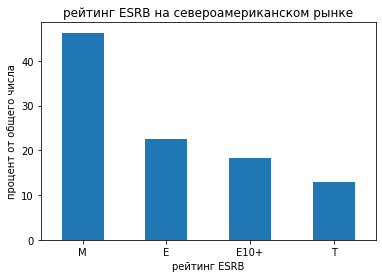

In [99]:
na = games_8.groupby('rating')['na_sales'].sum()
na_percent = na / na.sum() * 100
na_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('рейтинг ESRB на североамериканском рынке')
plt.xlabel('рейтинг ESRB')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=0, ha='center')
plt.show()

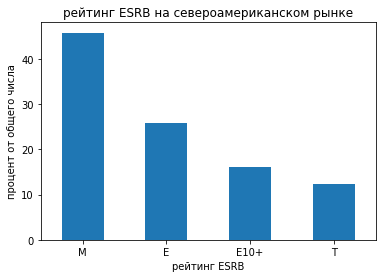

In [100]:
eu = games_8.groupby('rating')['eu_sales'].sum()
eu_percent = eu / eu.sum() * 100
eu_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('рейтинг ESRB на североамериканском рынке')
plt.xlabel('рейтинг ESRB')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=0, ha='center')
plt.show()

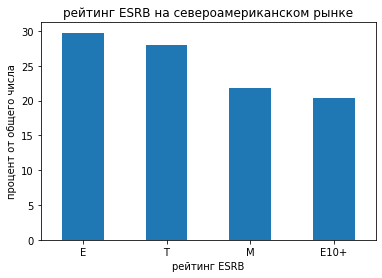

In [101]:
jp = games_8.groupby('rating')['jp_sales'].sum()
jp_percent = jp / jp.sum() * 100
jp_percent.sort_values(ascending=False).head().plot(kind='bar')
plt.title('рейтинг ESRB на североамериканском рынке')
plt.xlabel('рейтинг ESRB')
plt.ylabel('процент от общего числа')
plt.xticks(rotation=0, ha='center')
plt.show()

Североамериканский рынок:
    1. практически половина игр с рейтингом M – mature, E и E10+ на 2 и 3 местах и в конце T
    2. долевые позиции с второго по 4 место находятся достаточно близко, но позиция первого места почти в два раза больше позиций 2 места
    
Европейский рынок:
    1. ситуация полностью похожа на североамериканский рынок
    
Японский рынок:
    1. как и по-другим позициям, японский рынок сильно отличается от соседов, как минимум порядком: E, T, M, E10+
    2. долевые позиции достаточно равномерны, в отличие от других рынков

#### Промежуточный итог

На **североамериканском и европейском рынках** ситуация практически одинаковая. Практически половина игр с рейтингом **M** – mature, **E и E10+** на 2 и 3 местах и в конце **T**. 

На **японском рынке** как и по-другим позициям ситуация **сильно отличается от соседов**, как минимум порядком: **E, T, M, E10+**. Долевые позиции достаточно равномерны.

<a id="sum_4"></a>
## Вывод
 * [к началу шага](#port)

Так как **североамериканский и и европейский рынки** очень **похожи**, я решил их объединить, отметить их маленькие различия.

**Североамериканский и европейский рынки**:
1. бОльшая часть пользователей покупает игры для непортативных приставок, в Америке отдаётся предпочтение своему производителю – Xbox, но и там, и там есть Sony в лидерах
2. лидер по жанрам – Action, долевые позиции первой пятёрки находятся совсем рядом, но в Америке больше любят играть в Minecraft, в Европе – в гонки
3. практически половина игр с рейтингом M – mature, E и E10+ на 2 и 3 местах и в конце T
    
**Японский рынок**:
1. практически половина продаж для местной портативной приставки – 3DS, остальные тоже местные – Sony
2. Action на втором месте, но на первом месте Role-Playing из-за игры Pokemon X/Y и остальных, есть Simulation из-за Animal Crossing и Fighting в пятёрке, спортивные игры, шутеры и гонки не так сильно интересуют
3. сильно отличается от соседов, как минимум порядком мест: E, T, M, E10+, но долевые позиции достаточно равномерны.

<div class="alert alert-success">

**Комментарий ревьюера:** Согласен с твоими выводами!
</div>

<a id="hyp"></a>
## Шаг 5. Проверка гипотез
 * [к оглавлению](#first)
 * [к выводу](#sum_5)
 * [к следующему шагу](#hyp)
 * [к предыдущему шагу](#port)
 
1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#dif_1)
2. [Средние пользовательские рейтинги жанров Action и Sports разные](#dif_2)

Будем использовать **датасеты, которые мы используем (актуальный период)** и не забудет о том, что -1 в **user_score** не учитывается, чтобы не было сильных погрешностей (а то ведь возникнет погрешность общая)

<a id="dif_1"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 * [к оглавлению шага 5](#hyp)
 * [к следующему подпункту шага 4](#dif_2)

Для начала проверим дисперсии выборок, чтобы понять, с каким параметром **equal_var** использовать метод **ttest_ind** (стандартный **True**). Воспользуемся тестом Левене. Если **p-value** по нему меньше, чем уровень значимость, то это **equal_var=False**, если нет, то **equal_var=True**. Да, напоминаю, что мы проверяем по данным актуального периода.

In [102]:
sample_1 = games_8.query('platform == "PC" & user_score != -1')['user_score']
sample_2 = games_8.query('platform == "XOne" & user_score != -1')['user_score']
alpha = 0.05
stat, p = stats.levene(sample_1, sample_2)
if p < alpha:
    print('equal_var=False')
else:
    print('equal_var=True')

equal_var=False


Окей! Значит ставим такой показатель на тест. Дисперсии выборок не одинаковы.

In [103]:
results = stats.ttest_ind(sample_1, sample_2, equal_var=False)
alpha = 0.05

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('принимаем альтернативную гипотезу')
else:
    print('не можем отвергнуть нулевую гипотезу')

p-value:  0.1972121942700212
не можем отвергнуть нулевую гипотезу


Результат значит, что **мы не можем пока отвергнуть утверждение**, что средние показатели по пользовательским рейтингам платформ **XOne** и **PC** одинаковые. С определённой вероятностью **они похожи**.

<a id="dif_2"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные
 * [к оглавлению шага 5](#hyp)
 * [к предыдущему подпункту шага 4](#dif_1)

Сделаем такую же проверку, как и в прошлый раз.

In [104]:
sample_1 = games_8.query('genre == "Action" & user_score != -1')['user_score']
sample_2 = games_8.query('genre == "Sports" & user_score != -1')['user_score']
alpha = 0.05
stat, p = stats.levene(sample_1, sample_2)
if p < alpha:
    print('equal_var=False')
else:
    print('equal_var=True')

equal_var=False


In [105]:
results = stats.ttest_ind(sample_1, sample_2, equal_var=False)
alpha = 0.05

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('принимаем альтернативную гипотезу')
else:
    print('не можем отвергнуть нулевую гипотезу')

p-value:  3.5464208425405923e-28
принимаем альтернативную гипотезу


А в этом случае мы принимаем альтернативную гипотезу, то есть утверждаем, что **средние пользовательские рейтинги жанров Action и Sports** разные.

<a id="sum_5"></a>
## Вывод
 * [к началу шага](#hyp)

**Мы не можем пока отвергнуть утверждение, что средние показатели по пользовательским рейтингам платформ XOne и PC одинаковые**. С определённой вероятностью они похожи. По второй гипотезе **мы принимаем альтернативную гипотезу, то есть утверждаем, что средние пользовательские рейтинги жанров Action и Sports разные**.

<div class="alert alert-success">

**Комментарий ревьюера:** И тут ты ничего не упустил и все сделал как надо 👍
</div> 

<a id="summary"></a>
## Шаг 6. Общий вывод по работе
 * [к оглавлению](#first)
 * [к предыдущему шагу](#hyp)

У нас есть **датасет с играми от 1985 до 2016 года**. По каждой игре в таблице есть её **название, платформа, для которой вышла игра, год выпуска, жанр, количество продаж по регионам, рейтинг критиков и пользователей, рейтинг ESRB**. Мы сразу убрали две строки, в которых не было названия игры и жанра, так как они не несут большой информационной важности. И да, некоторые игры повторяются, потому что выходили на разных платформах и даже иногда переиздавались.

В **year_of_release** я заполнил данные сначала по тому, есть ли год выпуска в названии игры, потом по схожим названиям игр только на других приставках, а потом уже по медианным значениям игр на определённых платформах.

В **rating** я сначала заполнил по схожим названиям игр, потом заполнил по схожим названиям серий. Осталось порядка **6к незаполненных строк**, но я их оставил, так как это не лишние данные и их по-другому никак не заполнить так, чтобы это не было некорректно (типа случано будет **M** для **Tetris** или что-то типа того).

В **user_score** я не стал заполнять **tbd**, а просто поменял на значение **-1**, так как их не было смысла заполнять (они не заполнены, так как этих **данных на тот момент не было**, потому что пользователи не поставили ни одной оценки этим играм и правильно было бы это учитывать именно так, а не заменяя на какое-то значение). Остальные значения я **заполнил таким же методом, как и в предыдущих случаях: через оценки по тем же играм на других платформах, а потом через пивот по году, платформе и жанру, сгруппировав их по среднему значению**. Так же сделал и с **critic_score**.

Количество выпускаемых игр **связано с поколениями приставок**: с появляением новых приставок, **количество игр возрастало**, но в последние разы это произошло с меньшей амплитудой, видимо, потому что тормозной путь приставок прошлого поколения, так сказать, уменьшился и они быстрее уходят с рынка. **Следует ориентироваться на корпорации-произвотелей: Nintendo, SONY, Microsoft и компьютерные, так как у них всегда практически есть приставка нового поколения и это, можно считать, нормальная такая олигополия (несколько участников почтимонополистов)**. И есть ещё такая тенденция: **после выхода новой приставки следует подождать годик, чтобы люди успели её купить, а до этого есть смысл продавать больше игр на старые приставки. В общем, ситуацию с приставками надо мониторить просто, чтобы не закупиться ненужными играми.**

В среднем **приставка присутствует на рынке порядка 6 лет, а у топ-10 – 10 лет**. Максимум платформ выходит 3 штуки в год, **в последние годы промежутки между выходами платформ стали больше (с 2006 по 2011 не выходили игры, в то время как в последнии разы разница между рядом стоящими годами были максимум 3 года)**.

Я выбрал **актуальным промежутком – промежуток от 2012 года, когда появились приставки последнего поколения**. А самые продаваемые приставки для нас – **8-го поколения**. Это видно и из данных: погодовых продаж по этим приставкам.

По «ящикам с усами» видно, что **наибольший разброс у PS4 и 3DS, самые большие IQR у PS4 и XOne**. Значит, **основные тенденции задают приставки из первой тройки**.

Я **выбрал для анализа лидера рынка - PS4**, посмотрел на диаграмы рассеивания отзывов и продаж, посчитал корреляцию и получил такие результаты:

1. отзывы пользователей слабо коррелируют с общими продажами (практически не коррелируют)
2. отзывы критиков имеют близкую к средней положительной оценке корреляцию, но, опять же, не очень сильную
3. следует обращать внимание на отзывы (критиков), но это не очень сильный фактор, как бы ни казалось.

По остальным платформам **корреляция с оценками относительно схожая**.

По количеству игр видно, что **явный лидер по жанрам – Action**, за ним остальные игры распределены более равномерно в таком порядке: **Role-Playing, Adventure, Sports, Shooter и так далее**. Остальных выпускается гораздо меньше. Можно точно утверждать, что **есть две группы по жанрам, если говорить о продажах: первая четвёрка и остальные, они явно разделяеются по продажам**. Если говорить о совсем выделяющихся значениях, то, в принципе, все значение нормально распределены и не выделяются очень сильно (как Action в графике колтичества игр), но безусловно: **Action – лидер, Puzzle – аутсайдер**.

Так как **североамериканский и и европейский рынки очень похожи**, я решил их объединить, отметить их маленькие различия.

**Североамериканский и европейский рынки**:

1. бОльшая часть пользователей покупает игры для непортативных приставок, в Америке отдаётся предпочтение своему производителю – Xbox, но и там, и там есть Sony в лидерах
2. лидер по жанрам – Action, долевые позиции первой пятёрки находятся совсем рядом, но в Америке больше любят играть в Minecraft, в Европе – в гонки
3. практически половина игр с рейтингом M – mature, E и E10+ на 2 и 3 местах и в конце T

**Японский рынок**:

1. практически половина продаж для местной портативной приставки – 3DS, остальные тоже местные – Sony
2. Action на втором месте, но на первом месте Role-Playing из-за игры Pokemon X/Y и остальных, есть Simulation из-за Animal Crossing и Fighting в пятёрке, спортивные игры, шутеры и гонки не так сильно интересуют
3. сильно отличается от соседов, как минимум порядком мест: E, T, M, E10+, но долевые позиции достаточно равномерны.

**Проверка гипотез** показала, что:

**Мы не можем пока отвергнуть утверждение, что средние показатели по пользовательским рейтингам платформ XOne и PC одинаковые**. С определённой вероятностью они похожи. По второй гипотезе **мы принимаем альтернативную гипотезу, то есть утверждаем, что средние пользовательские рейтинги жанров Action и Sports разные**.

**Резюмируя**, могу сказать, что:

**Метод, по которому можно прогнозировать, какие игры будут лучше продаваться**:
1. нужно выбрать актуальный промежуток, желательно промежуток последнего поколения приставок, либо включая предыдущий тоже
2. сегментировать рынки, рассматривать их в отдельности
3. выбрать в итоге для каждого рынка наиболее популярные приставки и жанры
4. основываться на отзывах критиков, но не делать на этом большой упор, отзывы пользователей важны, если они отрицательно, но не так сильно коррелируют

**В нашем случае для каждого рынка нужно делать упор по тем приставкам и жанрам, которые указаны у нас в портретах по регионам.**

<div class="alert alert-success">

**Вывод:** Ты проделал огромную работу и у тебя получился, не побоюсь этого слова, харизматичный проект, который читаешь с интересом и погружением. Я с радостью сообщаю, что твой проект принят! Это бывает достаточно редко, когда проект проходит с первого раза, с чем я тебя тоже поздравляю! Продолжай в том же духе! Желаю тебе дальнейших успехов! :)
</div>